<a href="https://colab.research.google.com/github/Israelamat/Study-and-prediction-of-U.S.-contamination/blob/main/Proyecto_Final_IA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Por qué es relevante estudiar la contaminación del aire y predecirla

La contaminación atmosférica es uno de los principales problemas medioambientales y de salud pública a nivel mundial. Según la Organización Mundial de la Salud (OMS), más del 90% de la población mundial respira aire contaminado, lo que contribuye a más de 7 millones de muertes prematuras al año (OMS, 2018).

En Estados Unidos, a pesar de las políticas regulatorias como la Clean Air Act, todavía existen numerosas regiones que exceden los estándares de calidad del aire, especialmente en áreas urbanas e industriales. La exposición prolongada a contaminantes como el dióxido de nitrógeno (NO₂), ozono (O₃), dióxido de azufre (SO₂) y monóxido de carbono (CO) está asociada a enfermedades respiratorias, cardiovasculares y aumento de hospitalizaciones (EPA, 2021).

Dada la importancia de monitorear y controlar estos contaminantes, surge la necesidad de desarrollar modelos predictivos que permitan anticipar los niveles de contaminación en el futuro. Un modelo de este tipo no solo ayuda a comprender las dinámicas de la calidad del aire, sino que también puede servir como herramienta de apoyo para:

Activar alertas tempranas ante posibles episodios de contaminación grave.

Ayudar a planificar políticas públicas y medidas de mitigación.

Informar a la población vulnerable (niños, ancianos, personas con asma).

Además, el análisis de los datos históricos de contaminación permite explorar la evolución de la calidad del aire a lo largo del tiempo y evaluar si las tendencias actuales son sostenibles o si, por el contrario, seguimos en una trayectoria que podría empeorar los niveles de contaminación en el futuro.

Por tanto, este proyecto tiene como objetivo desarrollar un modelo de predicción de la calidad del aire, utilizando un dataset real de contaminación en Estados Unidos que incluye medidas de cuatro contaminantes principales en distintas localizaciones, fechas y horarios. Este análisis permitirá no solo predecir valores futuros, sino también identificar factores clave que influyen en los niveles de contaminación y aportar una visión sobre el posible impacto de mantener las mismas condiciones en los próximos años.

El estudio de la contaminación del aire a través de técnicas de machine learning es un área activa de investigación (Zhang et al., 2012; Wang & Chen, 2018) y puede proporcionar soluciones complementarias a los sistemas tradicionales de monitoreo mediante modelos estadísticos.

# Bibliografía:

Organización Mundial de la Salud (2018). Ambient air pollution: Health impacts. https://www.who.int/airpollution

United States Environmental Protection Agency (EPA) (2021). Air Quality Trends. https://www.epa.gov/air-trends

Zhang, Y., Bocquet, M., Mallet, V., Seigneur, C., & Baklanov, A. (2012). Real-time air quality forecasting, part I: History, techniques, and current status. Atmospheric Environment, 60, 632-655.

Wang, Y., & Chen, Y. (2018). Air quality forecasting using machine learning algorithms: A review. Current Pollution Reports, 4(2), 104–113.

In [43]:
#Instalamso openml para poder acceder a los datasets
!pip install openml

In [44]:
# Importamos openml para cargar el dataset en cuestion
# Enlace al dataset; https://www.openml.org/search?type=data&status=active&id=43586
import openml
dataset = openml.datasets.get_dataset(43586)
print(type(dataset))

<class 'openml.datasets.dataset.OpenMLDataset'>


In [45]:
# Lo transformamos al formato CSV para poder trabajar de una forma mas comoda
X, y, attribute_names, _ = dataset.get_data(target=dataset.default_target_attribute, dataset_format='dataframe')
df = X.copy()
df[dataset.default_target_attribute] = y

# Ver primeras filas
print(df.head())

   Unnamed:_0  State_Code  County_Code  Site_Num  \
0           0           4           13      3002   
1           1           4           13      3002   
2           2           4           13      3002   
3           3           4           13      3002   
4           4           4           13      3002   

                                   Address    State    County     City  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   Date_Local          NO2_Units  ...  SO2_Mean  SO2_1st_Max_Value  \
0  2000-01-01  Parts per billion  ...  3.000000                9.0   
1  2000-01-01  Parts per billion  ...  3.000000                9.0   
2  2000-01-01  Parts per billion

# Análisis del dataset

1. El linaje de los datos se refiere a la historia de las transformaciones y manipulaciones que los datos han sufrido desde su origen hasta su estado actual. En este caso, hemos revisado el dataset y no se han encontrado problemas evidentes que indiquen manipulaciones incorrectas o inconsistencias en los datos. Los registros parecen seguir un formato coherente, y las columnas corresponden a medidas de contaminación del aire en diferentes ubicaciones de Estados Unidos, con variables bien definidas como niveles de NO2, O3, SO2, CO, entre otros. No hay indicios de que los datos hayan sido alterados de manera inapropiada.

2. La licencia del dataset es libre de restricciones para uso académico y de investigación, lo que permite que sea utilizado para proyectos educativos, modelado de predicción, y análisis sin la necesidad de pagar o solicitar permisos adicionales. Este tipo de licencia también facilita la distribución y el uso del dataset, permitiendo que sea compartido y modificado por otros usuarios con fines similares. Aseguramos que, según la fuente del dataset (probablemente OpenML o Kaggle), este tiene licencia abierta, lo que lo hace adecuado para proyectos de modelado y análisis.

Con 1 millón de registros y 30 columnas, el dataset es bastante adecuado para el desarrollo de un modelo de regresión en el que se busca predecir la calidad del aire en función de las variables disponibles. Teniendo en cuenta que el número de filas es grande, este volumen de datos proporciona una base sólida para entrenar el modelo sin riesgo de sobreajuste, siempre que las características utilizadas sean relevantes.

En cuanto a las carterísticas, 30 columnas no es un número excesivo en comparación con la cantidad de datos. De hecho, un número moderado de características en un dataset grande generalmente es manejable y permite construir modelos robustos y eficientes. Sin embargo, es importante aplicar un análisis de correlación y de relevancia de las características para asegurar que no haya variables redundantes o irrelevantes que puedan afectar el rendimiento del modelo.


# Análisis de datos exploratorio

In [46]:
# Aqui pondremos los modulos que usaremos para el analisis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Mostrar el tamaño (dimensión) del dataset: número de filas y columnas
print("Tamaño del dataset:")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}\n")

# Mostrar los nombres de todas las columnas presentes en el dataset
print("Columnas del dataset:")
print(df.columns)
print()

#############################################################################3

# Comprobar si hay valores nulos en cada columna y contar cuántos son
print("Número de valores nulos por columna:")
print(df.isnull().sum())
print()

# Eliminamos la columna llamada 'None'
# Esta columna contiene valores irrelevantes ("NONE") que no aportan ningún valor
# Al eliminarla, mejoramos la eficiencia del modelo y reducimos la
# dimensionalidad del dataset.
df = df.drop(columns=[None])

# Verificamos que la columna 'None' ha sido eliminada correctamente
# Al imprimir nuevamente los nombres de las columnas, podemos asegurarnos de que la columna ha sido eliminada.
print("\nNombres de las columnas después de la eliminación:", df.columns)

##################################################################################3

# Verificar si existen columnas completamente vacías (todas sus celdas nulas)
empty_cols = df.columns[df.isnull().all()]
if len(empty_cols) > 0:
    print("Columnas completamente vacías (todas sus celdas son nulas):")
    print(list(empty_cols))
else:
    print("No hay columnas completamente vacías.")
print()

# Mostrar el tipo de datos (dtype) de cada columna, para saber si son numéricas, de texto, etc.
print("Tipos de datos de las columnas:")
print(df.dtypes)
print()

# Mostrar un resumen estadístico básico de todas las columnas numéricas
print("Resumen estadístico de las variables numéricas:")
print(df.describe().transpose())
# Esta medida muestras valores atipicos, algo que veremos con mas tranquilidad
# en la parte de lso outliners

# Análisis detallado de las características numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Características numéricas analizadas:", list(numeric_cols))
print()

for col in numeric_cols:
    print(f"Analizando la variable numérica: {col}")
    print(f"Media: {df[col].mean():.2f}")
    print(f"Desviación estándar: {df[col].std():.2f}")
    print(f"Mínimo: {df[col].min()}")
    print(f"Máximo: {df[col].max()}")
    print()

# Análisis detallado de las características categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
print("Características categóricas analizadas:", list(categorical_cols))
print()

for col in categorical_cols:
    print(f"Analizando la variable categórica: {col}")
    print(f"Número de categorías: {df[col].nunique()}")
    print(f"Moda (categoría más frecuente): {df[col].mode()[0]}")
    print()

Tamaño del dataset:
Número de filas: 1746661
Número de columnas: 30

Columnas del dataset:
Index([       'Unnamed:_0',        'State_Code',       'County_Code',
                'Site_Num',           'Address',             'State',
                  'County',              'City',        'Date_Local',
               'NO2_Units',          'NO2_Mean', 'NO2_1st_Max_Value',
        'NO2_1st_Max_Hour',           'NO2_AQI',          'O3_Units',
                 'O3_Mean',  'O3_1st_Max_Value',   'O3_1st_Max_Hour',
                  'O3_AQI',         'SO2_Units',          'SO2_Mean',
       'SO2_1st_Max_Value',  'SO2_1st_Max_Hour',           'SO2_AQI',
                'CO_Units',           'CO_Mean',  'CO_1st_Max_Value',
         'CO_1st_Max_Hour',            'CO_AQI',                None],
      dtype='object')

Número de valores nulos por columna:
Unnamed:_0                 0
State_Code                 0
County_Code                0
Site_Num                   0
Address                    0
Sta

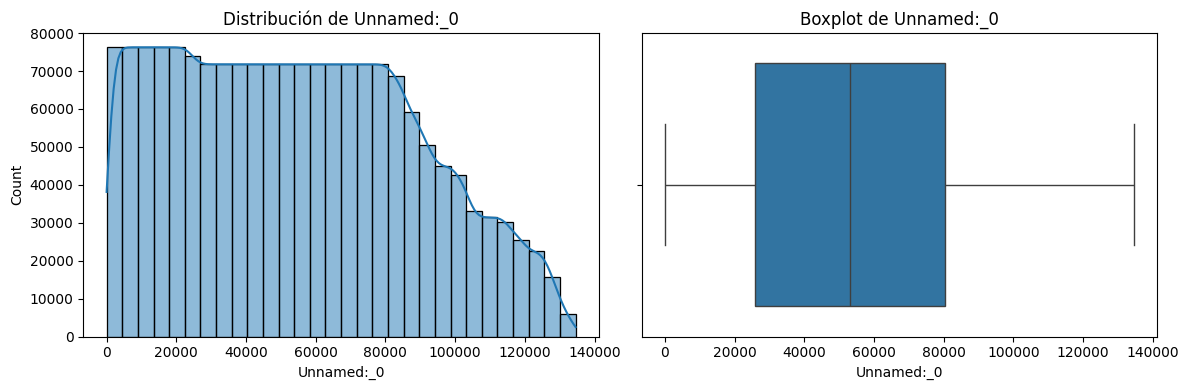

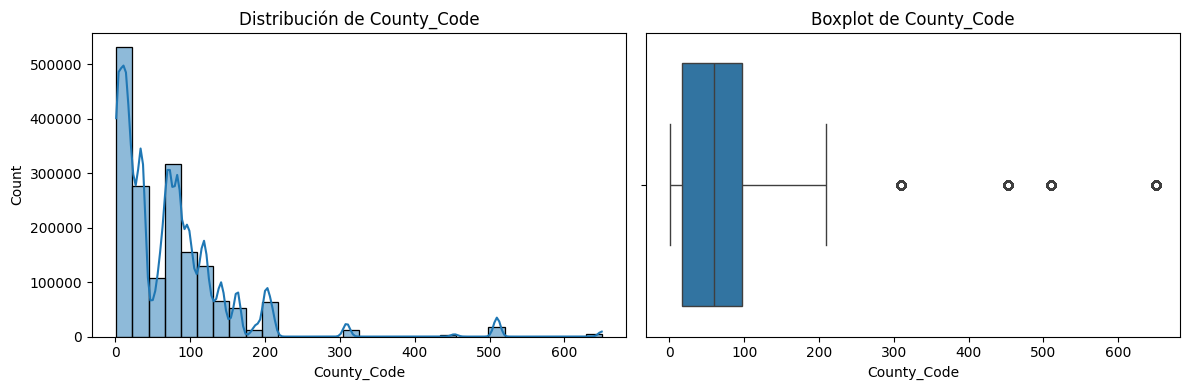

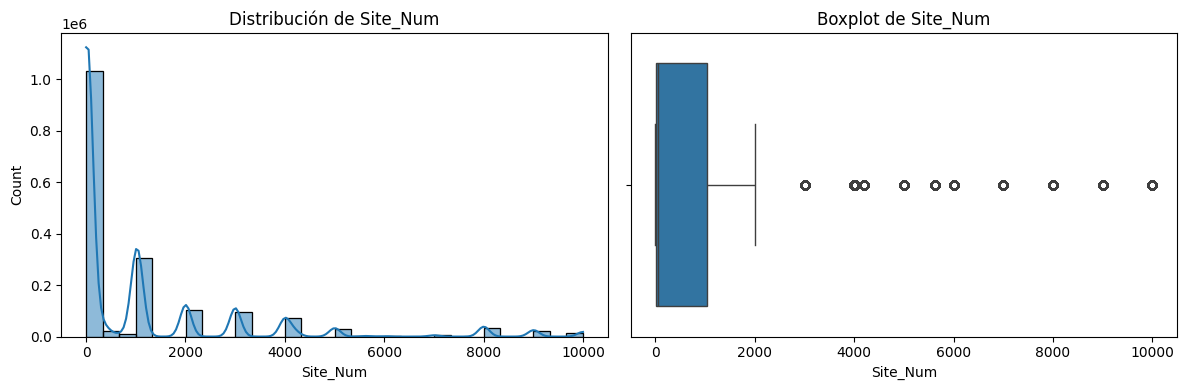

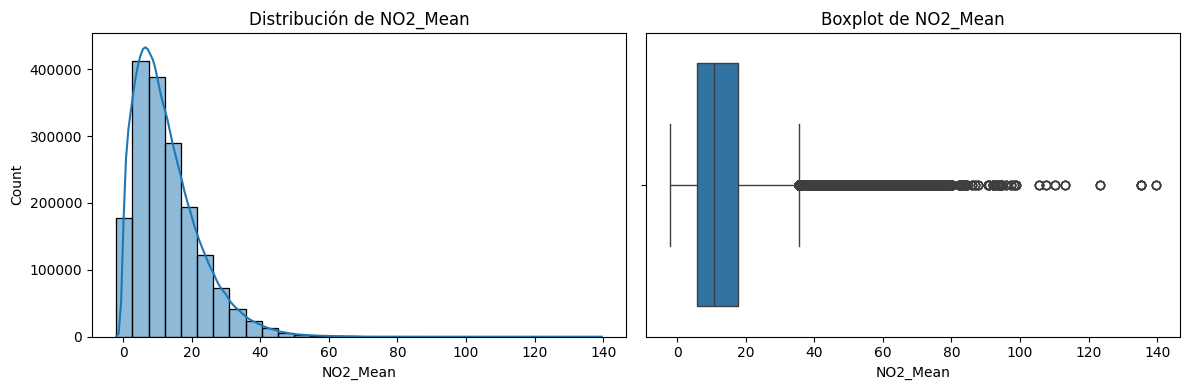

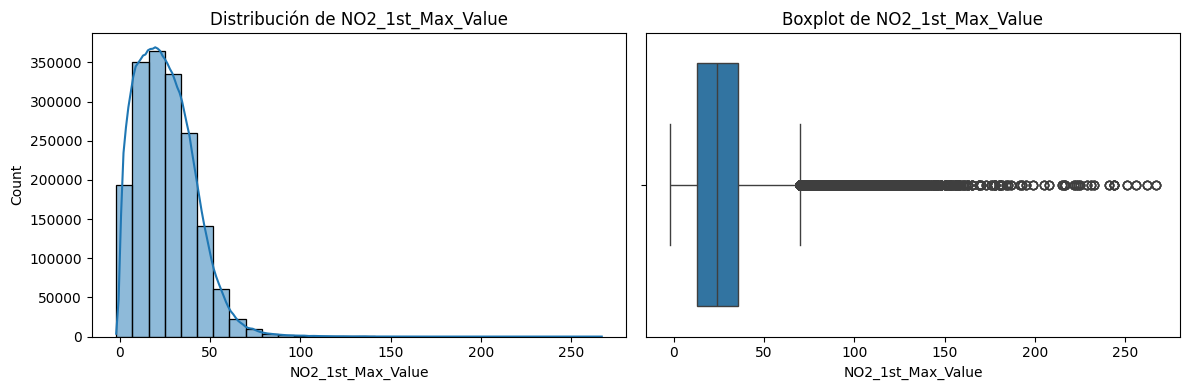

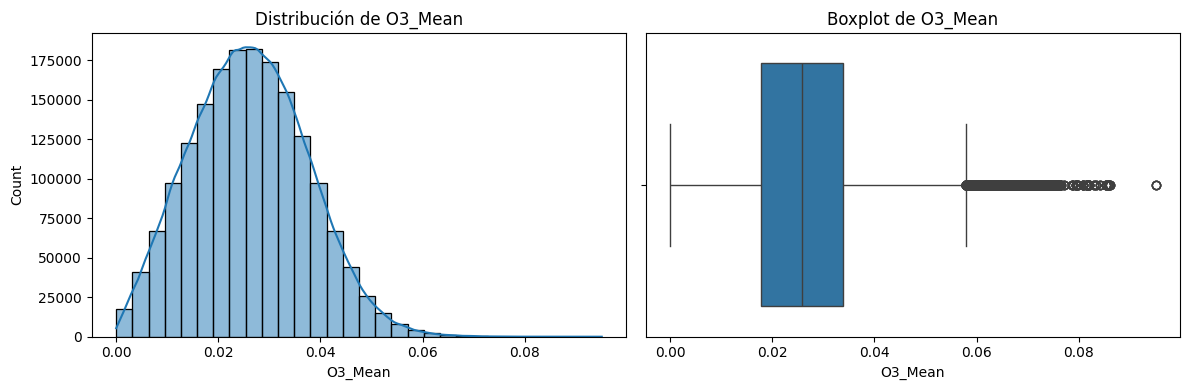

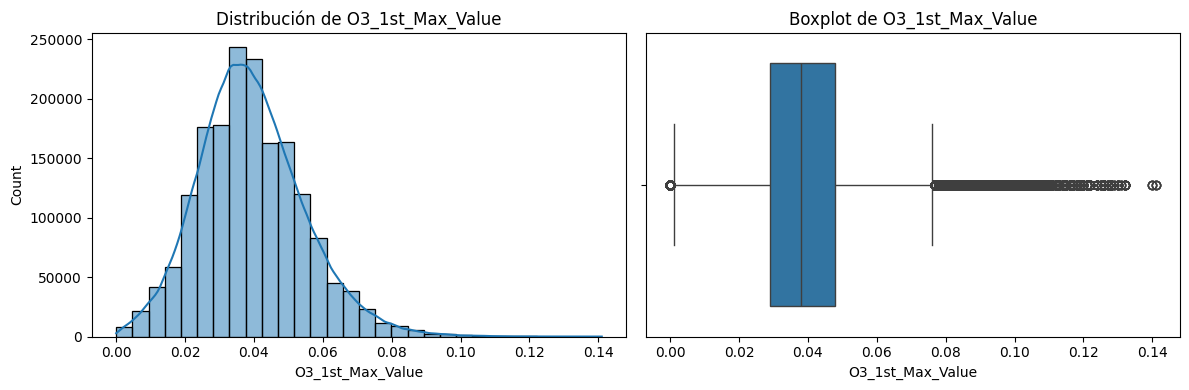

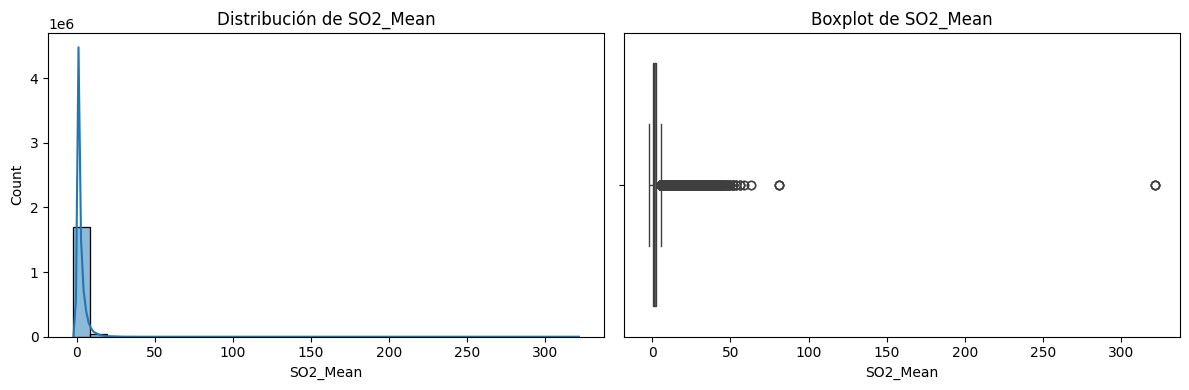

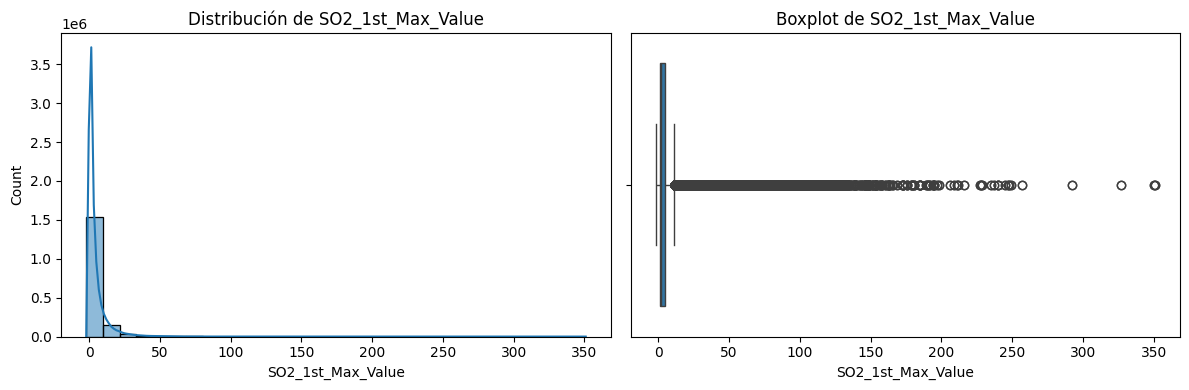

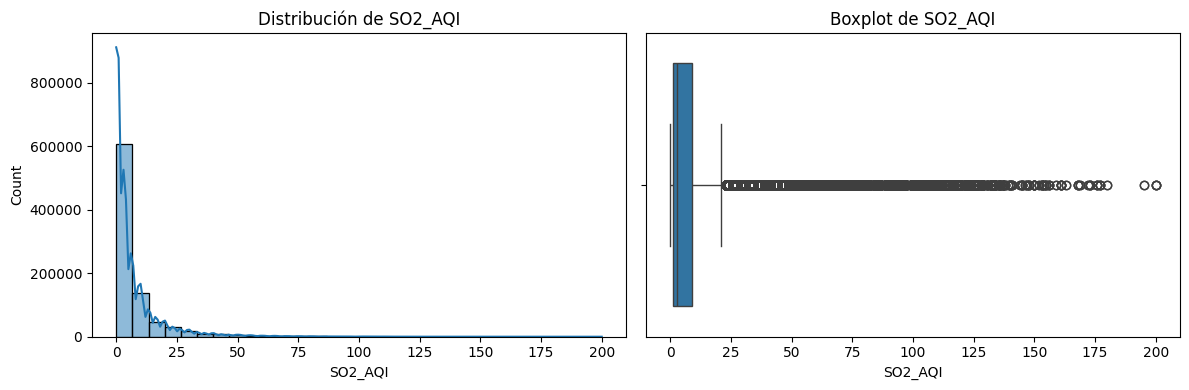

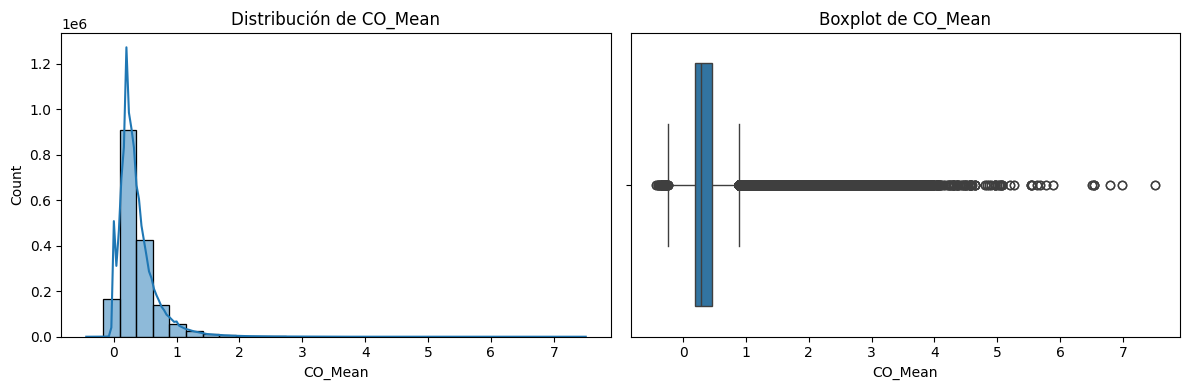

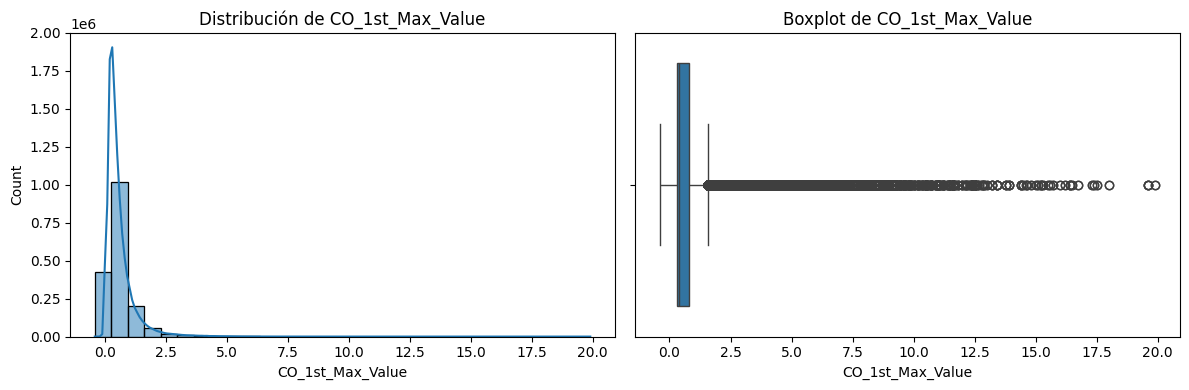

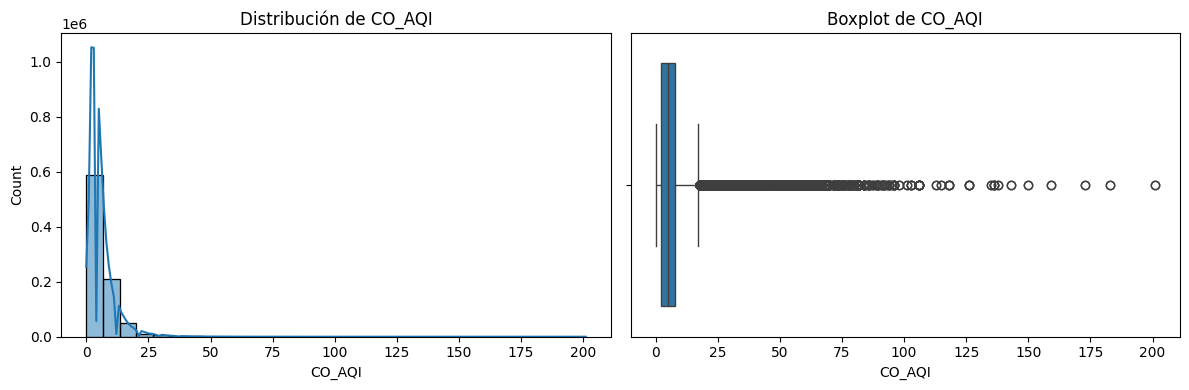

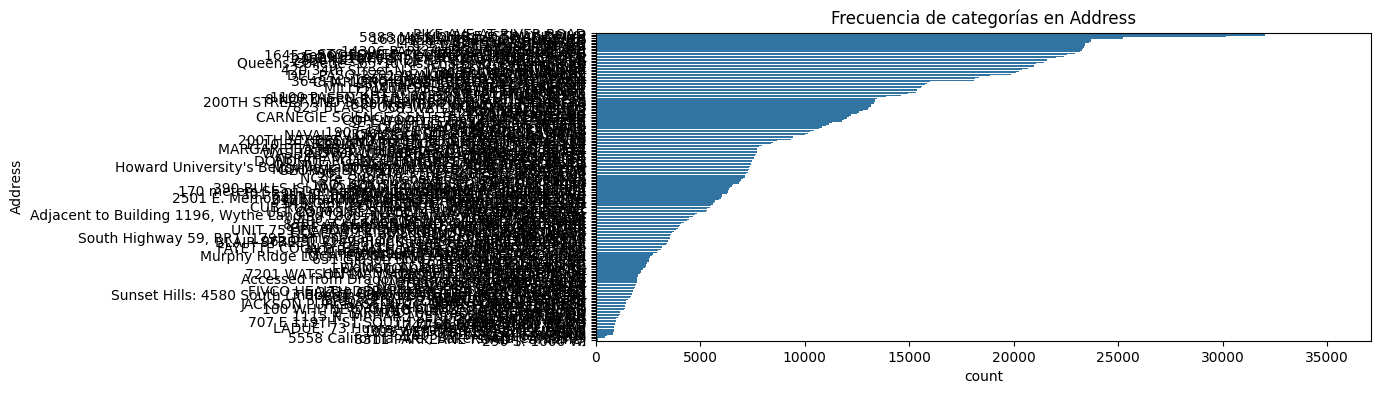

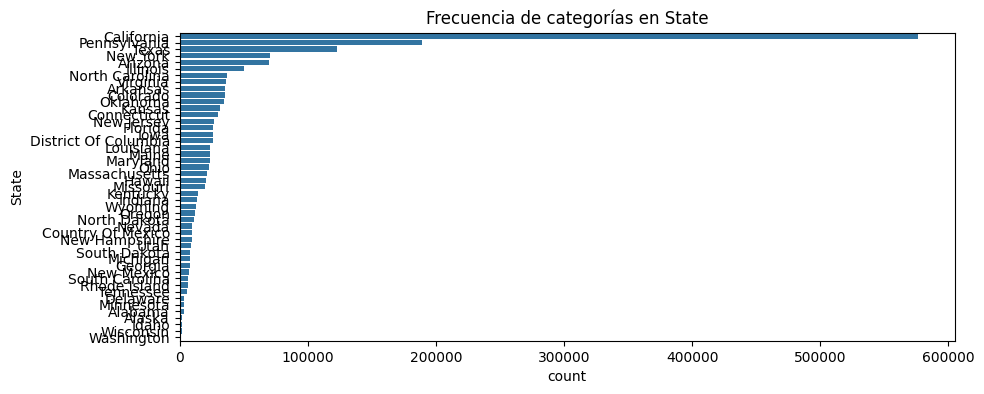

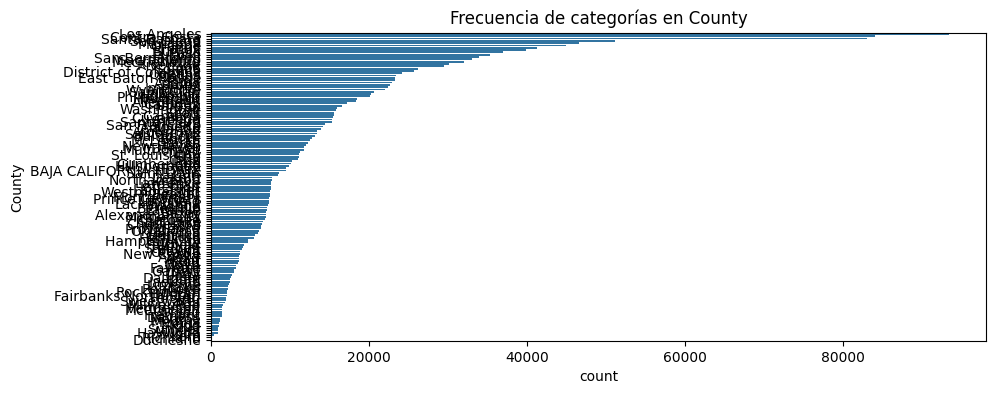

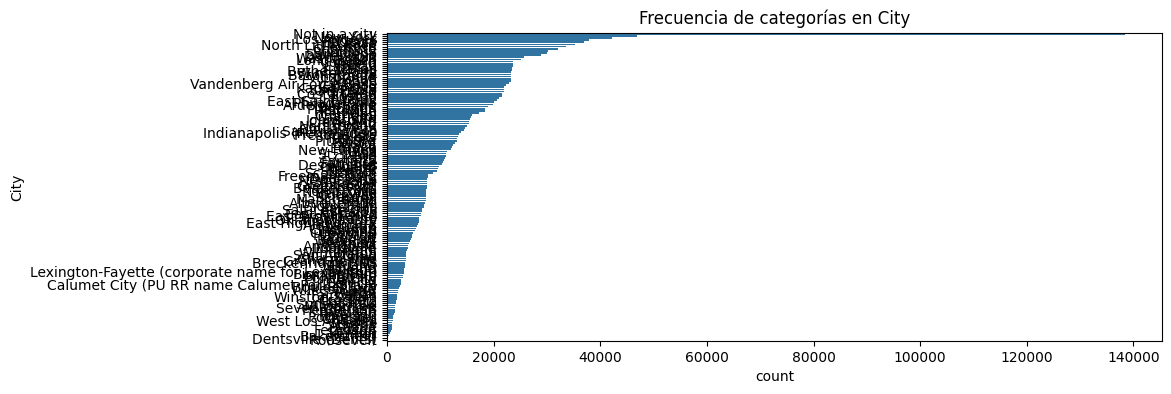

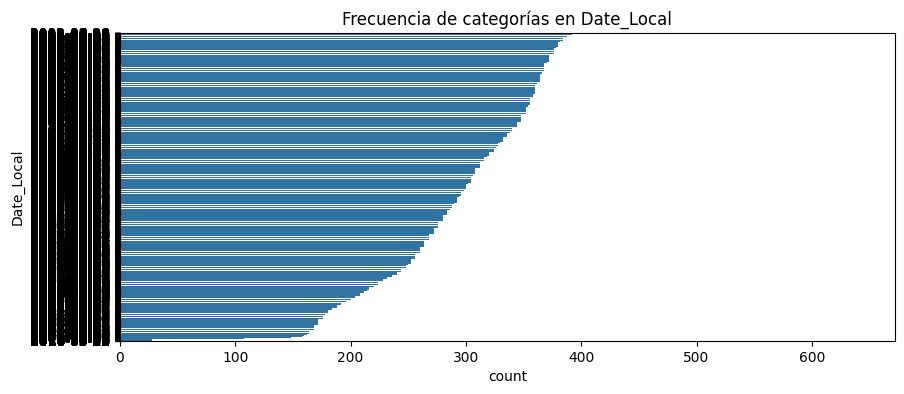

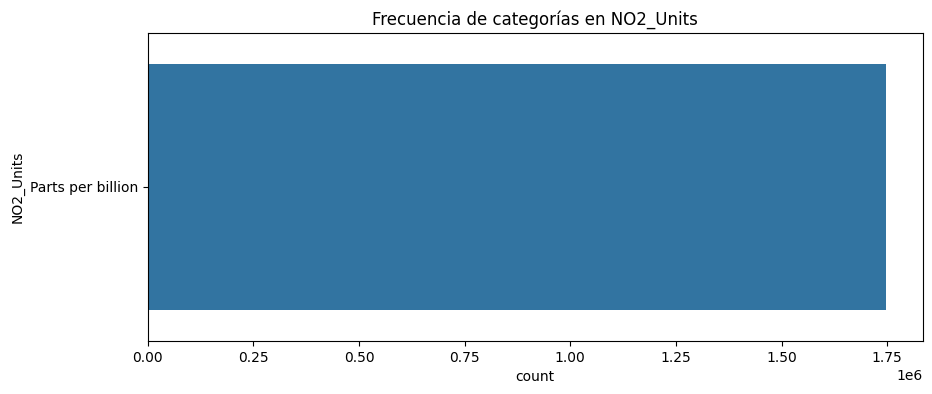

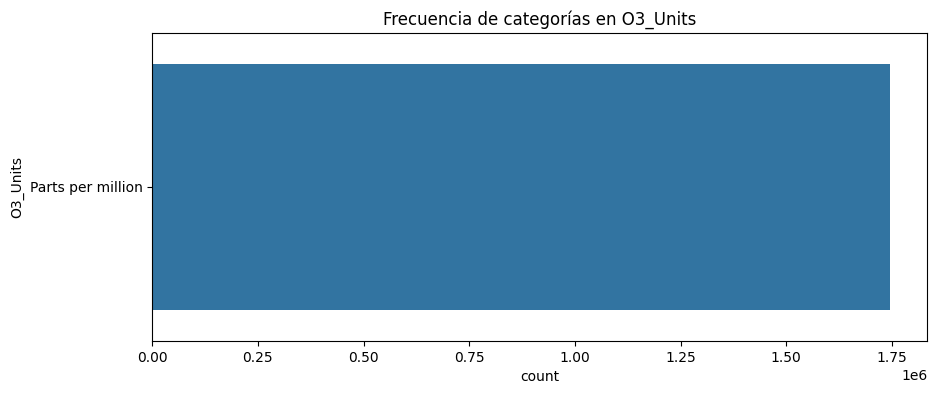

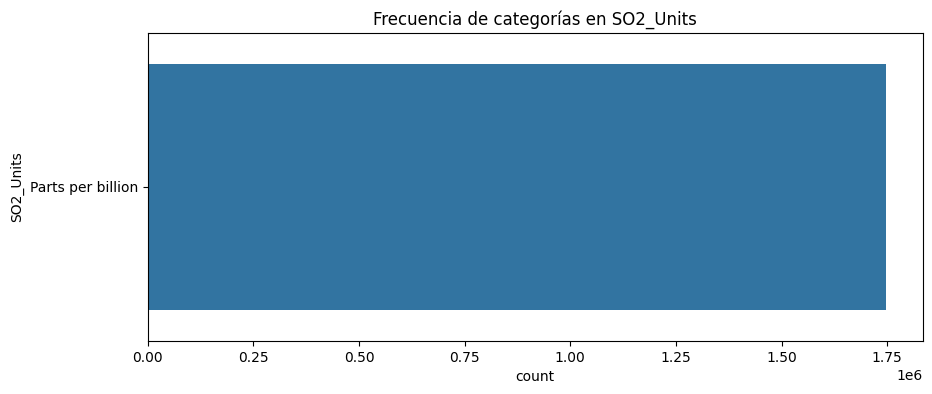

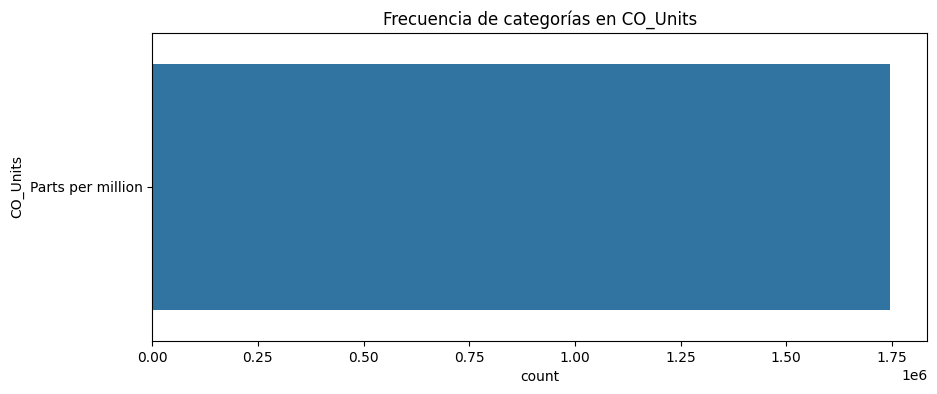

In [47]:
#Gráficos para las variables numéricas
for col in numeric_cols:
    # Creamos una figura con dos gráficos: histograma y boxplot
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma para ver la distribución
    sns.histplot(df[col].dropna(), bins=30, ax=axes[0], kde=True)
    axes[0].set_title(f"Distribución de {col}")

    # Boxplot para detectar posibles outliers
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()

# Gráficos para las variables categóricas
for col in categorical_cols:
    # Creamos un gráfico de barras (countplot) para ver la frecuencia de cada categoría
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Frecuencia de categorías en {col}")
    plt.show()

Tras mucho tiempo de analisis en informes citados en la bibliografia he llegado a la conclusion que la variable objetivo será: O3_AQI (Índice de Calidad del Aire del Ozono). En primer lugar, el AQI es una métrica estandarizada y directamente interpretable, utilizada por organismos de salud pública y medio ambiente para comunicar la calidad del aire de forma clara y comprensible. A diferencia de las concentraciones brutas (O3_Mean, O3_1st_Max_Value), el AQI ya incorpora umbrales sanitarios y criterios normativos que permiten traducir las mediciones en un impacto directo sobre la salud de la población.

Además, el ozono troposférico es uno de los contaminantes más relevantes en entornos urbanos e industriales, asociado a fenómenos de esmog y a problemas respiratorios, lo cual refuerza su valor como indicador clave de la calidad del aire. En comparación con otras opciones. Ademas ofrece un reto predictivo interesante y al mismo tiempo una mayor utilidad práctica.

# Análisis de outliers.
A continuacion haremos un analisis de outliers para comprender esos valores extremos y determinar si son errores, son eventos raros pero validos o si pueden afectar negativamente

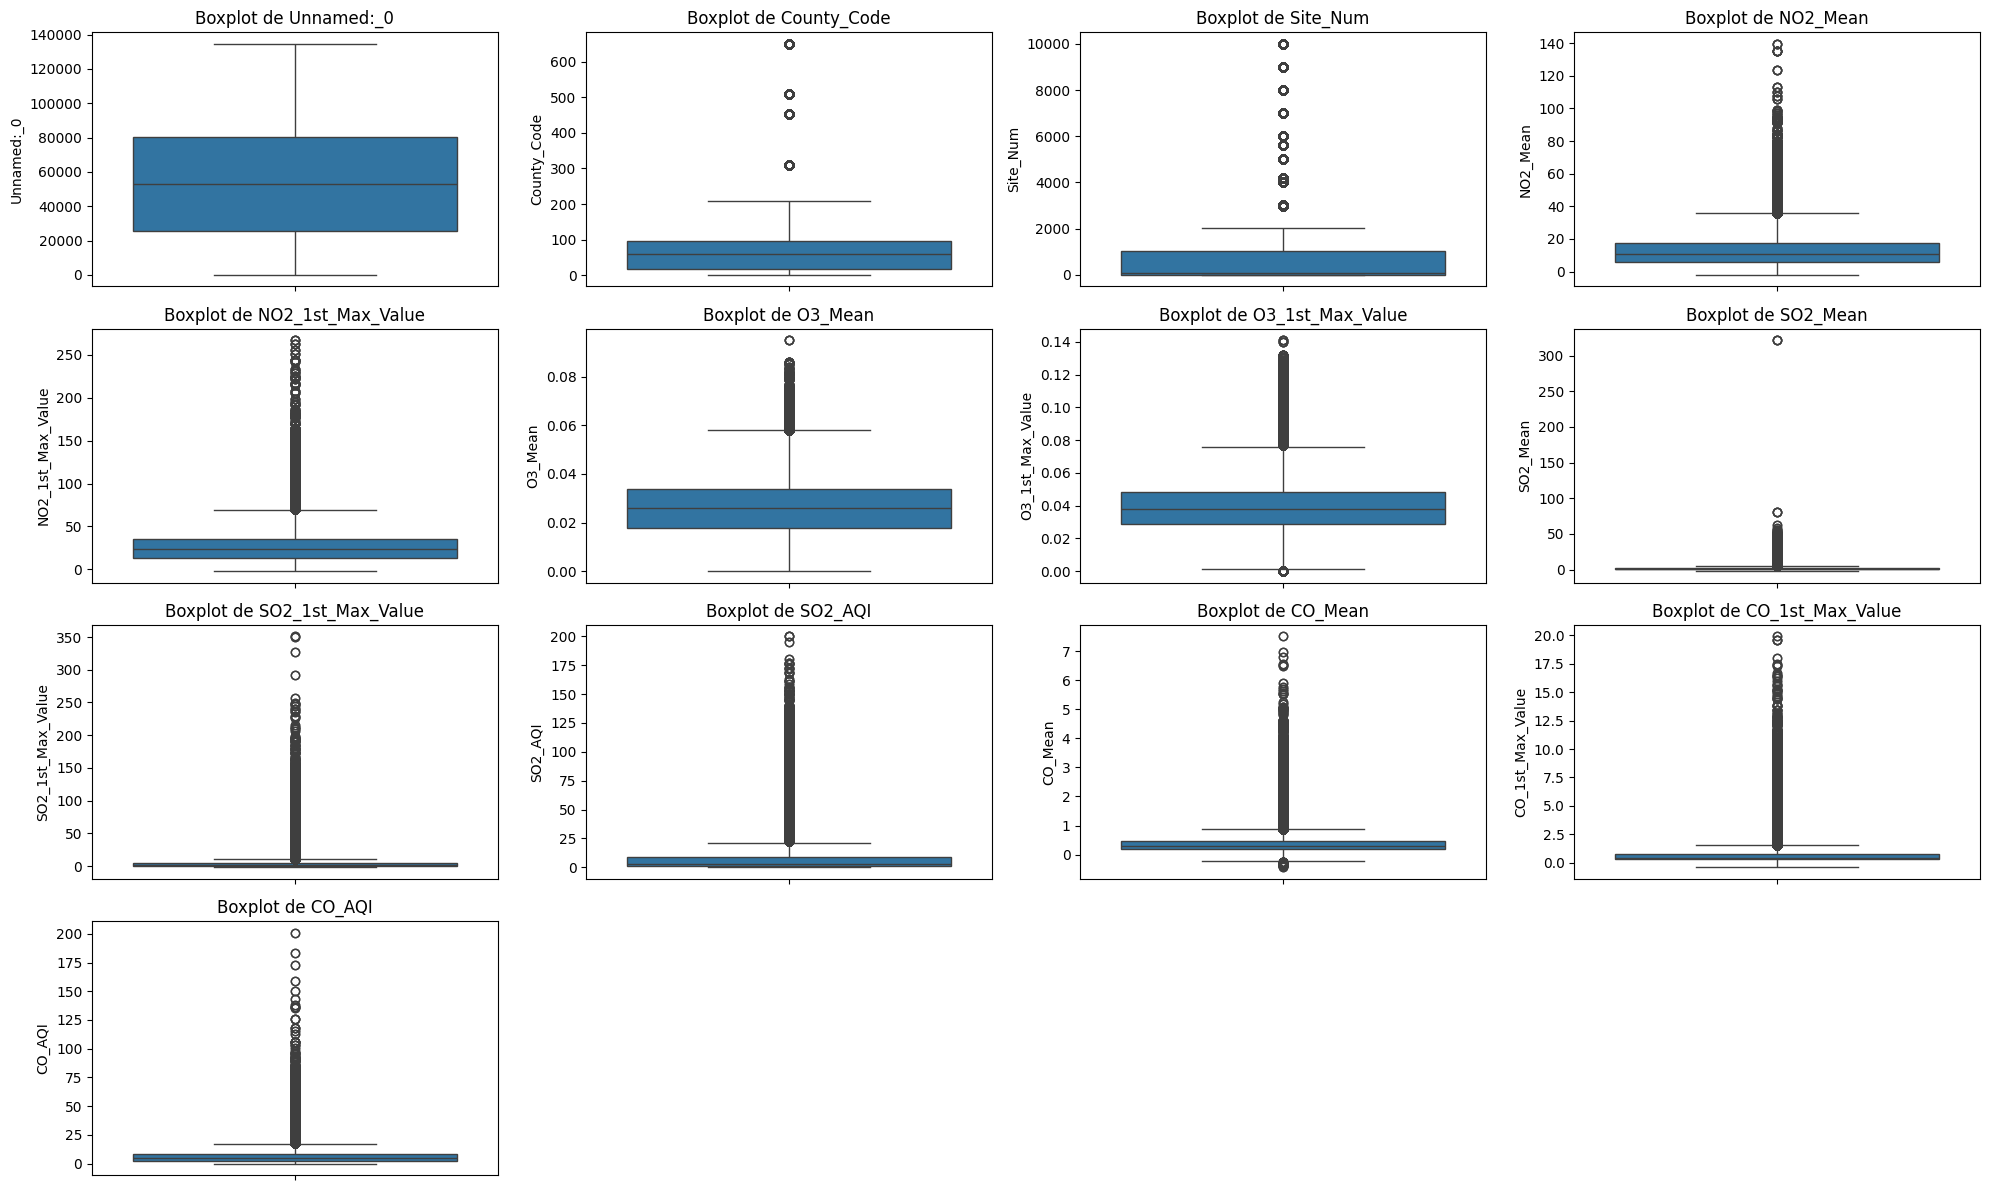

In [48]:
#Para hacer el análisis de outliers emplearemos boxplots
plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

Tras realizar un análisis exploratorio mediante diagramas de caja, se observa que la mayoría de las variables numéricas del dataset presentan una distribución muy concentrada en valores bajos y con una cantidad significativa de valores atípicos (outliers) hacia valores altos. Esto indica que, aunque la contaminación en general se mantiene en rangos bajos o moderados, existen episodios puntuales con niveles mucho más elevados. Este comportamiento es esperado en datos medioambientales, donde eventos de alta contaminación pueden ser esporádicos y localizados.

In [49]:
# Podemos calcular cuántos outliers tiene cada variable usando la regla de
# 1.5*IQR para ver el problema de los outliers desde otro angulo
print("\nNúmero de outliers por variable numérica (según 1.5*IQR):")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")


Número de outliers por variable numérica (según 1.5*IQR):
Unnamed:_0: 0 outliers
County_Code: 37472 outliers
Site_Num: 272820 outliers
NO2_Mean: 48083 outliers
NO2_1st_Max_Value: 17598 outliers
O3_Mean: 6888 outliers
O3_1st_Max_Value: 29428 outliers
SO2_Mean: 142365 outliers
SO2_1st_Max_Value: 167581 outliers
SO2_AQI: 67943 outliers
CO_Mean: 103129 outliers
CO_1st_Max_Value: 115148 outliers
CO_AQI: 35972 outliers


Con estas dos pruebas se ve con claridad que hay muchos valores atipicos o muy lejos de donde se encuentra la mayor concentracion de datos, ahora averiguaremos que datos son incorrectos con la "describe()"

In [50]:
df.describe()

,Unnamed:_0,State_Code,County_Code,Site_Num,NO2_Mean,NO2_1st_Max_Value,NO2_1st_Max_Hour,NO2_AQI,O3_Mean,O3_1st_Max_Value,O3_1st_Max_Hour,O3_AQI,SO2_Mean,SO2_1st_Max_Value,SO2_1st_Max_Hour,SO2_AQI,CO_Mean,CO_1st_Max_Value,CO_1st_Max_Hour,CO_AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
mean,5.471414e+04,2.230907e+01,7.169381e+01,1.118214e+03,1.282193e+01,2.541485e+01,1.173102e+01,2.389822e+01,2.612485e-02,3.920331e-02,1.017053e+01,3.605012e+01,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,3.372908e+04,1.725621e+01,7.948023e+01,2.003103e+03,9.504814e+00,1.599963e+01,7.877501e+00,1.516280e+01,1.136974e-02,1.534362e-02,4.003144e+00,1.978042e+01,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,2.575300e+04,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,5.304500e+04,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,8.033600e+04,4.000000e+01,9.700000e+01,1.039000e+03,1.771364e+01,3.570000e+01,2.000000e+01,3.300000e+01,3.391700e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,4.666670e-01,8.000000e-01,1.300000e+01,8.000000
max,1.345750e+05,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,200.000000,7.508333e+00,1.990000e+01,2.300000e+01,201.000000


El resumen estadístico muestra valores mínimos negativos en variables como NO2_Mean, SO2_Mean y CO_Mean, lo cual es físicamente imposible porque las concentraciones de gases no pueden ser negativas. Además, las variables NO2_1st_Max_Value y SO2_1st_Max_Value presentan máximos de 267 y 351 ppb respectivamente, lo cual podría estar fuera de los rangos normales dependiendo del contexto geográfico y temporal, sugiriendo posibles valores atípicos o errores de medición. Los rangos amplios y desviaciones estándar elevadas indican una alta dispersión, compatible con la presencia de outliers. Por ejemplo, CO_Mean tiene un máximo de 7.5 ppm, mientras su media es solo 0.36 ppm, sugiriendo que esos valores extremos afectan la distribución general. Asimismo, la variable CO_AQI alcanza hasta 201, pero su mediana es solo 6, lo que implica casos aislados de contaminación extrema o errores. La eliminación de outliers fue necesaria para reducir la influencia de estos valores extremos no representativos, que podrían distorsionar análisis estadísticos y modelos predictivos. Al eliminarlos, se asegura que el análisis se base en datos dentro de rangos físicamente plausibles y estadísticamente estables. Por tanto, limpiar los outliers permitió mejorar la calidad y fiabilidad de los datos sin perder información relevante sobre la variabilidad ambiental normal.

Dadas las circustancias se armará un dataset limpio sin tantos valores atipicos

In [51]:
df_clean = df.copy()

# Filtramos las filas para cada columna numérica
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mantenemos solo las filas dentro de los límites
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

# Mostramos las dimensiones del dataset original y del limpio
print("\nDimensiones del dataset original:", df.shape)
print("Dimensiones del dataset sin outliers:", df_clean.shape)

# df_clean.to_csv("dataset_sin_outliers.csv", index=False)

# Guardamos en esta variable las columnas numericas del dataset sin outliners
numeric_cols_clean = df_clean.select_dtypes(include=['float64', 'int64']).columns

print("""\nNúmero de outliers por variable numérica del dataset supuestamente
limpio (según 1.5*IQR):""")
for col in numeric_cols_clean:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")


Dimensiones del dataset original: (1746661, 29)
Dimensiones del dataset sin outliers: (257897, 29)

Número de outliers por variable numérica del dataset supuestamente
limpio (según 1.5*IQR):
Unnamed:_0: 0 outliers
County_Code: 0 outliers
Site_Num: 0 outliers
NO2_Mean: 4920 outliers
NO2_1st_Max_Value: 739 outliers
O3_Mean: 252 outliers
O3_1st_Max_Value: 780 outliers
SO2_Mean: 13293 outliers
SO2_1st_Max_Value: 8788 outliers
SO2_AQI: 0 outliers
CO_Mean: 4221 outliers
CO_1st_Max_Value: 3554 outliers
CO_AQI: 0 outliers


Con estas bajada de outliers si volvemos a hacer un "describe()" tendrian que arreglarse todos los valores atipicos o valores imposibles

In [52]:
df_clean.describe()

,Unnamed:_0,State_Code,County_Code,Site_Num,NO2_Mean,NO2_1st_Max_Value,NO2_1st_Max_Hour,NO2_AQI,O3_Mean,O3_1st_Max_Value,O3_1st_Max_Hour,O3_AQI,SO2_Mean,SO2_1st_Max_Value,SO2_1st_Max_Hour,SO2_AQI,CO_Mean,CO_1st_Max_Value,CO_1st_Max_Hour,CO_AQI
count,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000
mean,56308.903973,22.258611,68.241515,435.792871,9.704345,20.467149,11.627533,19.161840,0.026866,0.038456,10.095697,34.449776,0.881702,2.040857,8.269623,2.550565,0.277747,0.374356,5.757120,4.209475
std,34383.469236,17.150440,53.958558,630.120432,6.584589,12.416389,7.871869,11.725651,0.010232,0.012984,4.160824,14.332699,0.951049,1.863752,6.911041,2.815399,0.159577,0.220101,7.715749,2.618584
min,1.000000,1.000000,1.000000,1.000000,-2.000000,-2.000000,0.000000,0.000000,0.000042,0.001000,0.000000,1.000000,-2.000000,-2.000000,0.000000,0.000000,-0.166667,-0.100000,0.000000,0.000000
25%,27076.000000,6.000000,19.000000,8.000000,4.636364,10.100000,5.000000,9.000000,0.019458,0.029000,9.000000,25.000000,0.158333,0.700000,2.000000,0.000000,0.175000,0.200000,0.000000,2.000000
50%,54491.000000,17.000000,71.000000,41.000000,8.409091,19.000000,9.000000,18.000000,0.026625,0.038000,10.000000,33.000000,0.591304,1.400000,8.000000,1.000000,0.254167,0.300000,0.000000,3.000000
75%,83784.000000,40.000000,101.000000,1004.000000,13.500000,29.000000,20.000000,27.000000,0.034000,0.047000,11.000000,41.000000,1.258333,3.000000,13.000000,4.000000,0.375000,0.500000,9.000000,6.000000
max,134573.000000,80.000000,209.000000,2011.000000,33.891304,63.500000,23.000000,61.000000,0.057042,0.076000,23.000000,174.000000,5.173913,7.900000,23.000000,10.000000,0.760000,1.000000,23.000000,11.000000


Aunque el dataset ha sido limpiado, aún persisten valores negativos en columnas como NO₂, SO₂ y CO, los cuales no son válidos físicamente. Es necesario eliminarlos o corregirlos para evitar distorsiones en el análisis. Además, conviene revisar si hay registros asociados inconsistentes. Al depurar estos valores, el dataset estará completamente listo para su análisis.

Por lo que haremos ahora es sustituir esos valores por NaN para posteriormente
sustituirlos por la media

In [53]:
# Lista de columnas donde los negativos son imposibles
cols = ['NO2_Mean', 'NO2_1st_Max_Value', 'SO2_Mean', 'SO2_1st_Max_Value',
        'CO_Mean', 'CO_1st_Max_Value']

# Reemplazamos los valores negativos por NaN
df_clean[cols] = df_clean[cols].mask(df_clean[cols] < 0, np.nan)

# Sustituimos los NaN por la media de cada columna
for col in cols:
    mean_value = df_clean[col].mean()
    df_clean[col] = df_clean[col].fillna(mean_value)

In [54]:
df_clean.describe()

,Unnamed:_0,State_Code,County_Code,Site_Num,NO2_Mean,NO2_1st_Max_Value,NO2_1st_Max_Hour,NO2_AQI,O3_Mean,O3_1st_Max_Value,O3_1st_Max_Hour,O3_AQI,SO2_Mean,SO2_1st_Max_Value,SO2_1st_Max_Hour,SO2_AQI,CO_Mean,CO_1st_Max_Value,CO_1st_Max_Hour,CO_AQI
count,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000,257897.000000
mean,56308.903973,22.258611,68.241515,435.792871,9.707946,20.468877,11.627533,19.161840,0.026866,0.038456,10.095697,34.449776,0.902734,2.055199,8.269623,2.550565,0.277970,0.374392,5.757120,4.209475
std,34383.469236,17.150440,53.958558,630.120432,6.581793,12.414912,7.871869,11.725651,0.010232,0.012984,4.160824,14.332699,0.938358,1.854757,6.911041,2.815399,0.159344,0.220061,7.715749,2.618584
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000042,0.001000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27076.000000,6.000000,19.000000,8.000000,4.645833,10.100000,5.000000,9.000000,0.019458,0.029000,9.000000,25.000000,0.180000,0.700000,2.000000,0.000000,0.175000,0.200000,0.000000,2.000000
50%,54491.000000,17.000000,71.000000,41.000000,8.416667,19.000000,9.000000,18.000000,0.026625,0.038000,10.000000,33.000000,0.637500,1.500000,8.000000,1.000000,0.254167,0.300000,0.000000,3.000000
75%,83784.000000,40.000000,101.000000,1004.000000,13.500000,29.000000,20.000000,27.000000,0.034000,0.047000,11.000000,41.000000,1.258333,3.000000,13.000000,4.000000,0.375000,0.500000,9.000000,6.000000
max,134573.000000,80.000000,209.000000,2011.000000,33.891304,63.500000,23.000000,61.000000,0.057042,0.076000,23.000000,174.000000,5.173913,7.900000,23.000000,10.000000,0.760000,1.000000,23.000000,11.000000


Ahora ya no hay nigun valor imposible y el dataset esta mucho mas limpio, de todas formas seguimos contando con el dataset sin limpiar para a la hora de hacer el primer modelo ver la diferencia de predicciones y de entrenamiento

Ahora vamos a preprocesar los datos sobretodas vamos a tratar las columnas categoricas

In [55]:
categorical_cols_clean = df_clean.select_dtypes(include=['object']).columns
print("Características categóricas analizadas:", list(categorical_cols_clean))
print()

# De esta manera nos aseguramos que las columnas categoricas con str
for col in categorical_cols:
    tipos = df[col].map(type).unique()
    print(f"{col}: tipos de datos encontrados -> {tipos}")

# De esta manera nos haremos una idea de lo que hay en cada columna
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"- Número de categorías únicas: {df[col].nunique()}")
    print(f"- Ejemplos de valores: {df[col].unique()[:10]}")

Características categóricas analizadas: ['Address', 'State', 'County', 'City', 'Date_Local', 'NO2_Units', 'O3_Units', 'SO2_Units', 'CO_Units']

Address: tipos de datos encontrados -> [<class 'str'>]
State: tipos de datos encontrados -> [<class 'str'>]
County: tipos de datos encontrados -> [<class 'str'>]
City: tipos de datos encontrados -> [<class 'str'>]
Date_Local: tipos de datos encontrados -> [<class 'str'>]
NO2_Units: tipos de datos encontrados -> [<class 'str'>]
O3_Units: tipos de datos encontrados -> [<class 'str'>]
SO2_Units: tipos de datos encontrados -> [<class 'str'>]
CO_Units: tipos de datos encontrados -> [<class 'str'>]

Address:
- Número de categorías únicas: 204
- Ejemplos de valores: ['1645 E ROOSEVELT ST-CENTRAL PHOENIX STN'
 '2857 N MILLER RD-S SCOTTSDALE STN' '1237 S. BEVERLY , TUCSON'
 '2956-A TREAT BOULEVARD' '5551 BETHEL ISLAND RD'
 'UNIT 759 EL PORTAL SHOPPING CENTER, San Pablo'
 '583 W. 10TH ST., PITTSBURG' '1029 ETHEL ST, CALEXICO HIGH SCHOOL'
 '5558 Californi

Al analizar las columnas categóricas del dataset, se observa que las unidades de medida de los contaminantes no son homogéneas. En concreto, las concentraciones de NO₂ y SO₂ están expresadas en partes por mil millones (ppb), mientras que las de O₃ y CO están en partes por millón (ppm).

Esta diferencia de unidades puede introducir errores importantes en el análisis y en el modelo, ya que los valores numéricos de una misma magnitud no son directamente comparables si se expresan en distintas escalas. Por ejemplo, 1 ppm equivale a 1000 ppb, por lo que no tener esto en cuenta podría provocar que el modelo interprete que O₃ y CO tienen concentraciones más bajas, simplemente porque están en otra unidad.

Por tanto, es imprescindible realizar una homogeneización de unidades, convirtiendo todas las concentraciones a la misma medida. En este caso, se ha decidido pasar todos los valores a ppb (partes por mil millones), multiplicando por 1000 las columnas que están originalmente en ppm.

Este proceso se aplicará tanto al dataset original como al dataset limpio sin outliers, para asegurar la coherencia y consistencia de los datos durante todas las fases del proyecto.

Una vez se haya homogeneizado se eliminara la columna que expresa las unidades

In [56]:
# Convertimos O3 y CO de ppm a ppb en df_clean
df_clean['O3_Mean'] = df_clean['O3_Mean'] * 1000
df_clean['O3_1st_Max_Value'] = df_clean['O3_1st_Max_Value'] * 1000
df_clean['CO_Mean'] = df_clean['CO_Mean'] * 1000
df_clean['CO_1st_Max_Value'] = df_clean['CO_1st_Max_Value'] * 1000

# Convertimos O3 y CO de ppm a ppb también en df (dataset original)
df['O3_Mean'] = df['O3_Mean'] * 1000
df['O3_1st_Max_Value'] = df['O3_1st_Max_Value'] * 1000
df['CO_Mean'] = df['CO_Mean'] * 1000
df['CO_1st_Max_Value'] = df['CO_1st_Max_Value'] * 1000

def drop_columns_if_exist(df, cols_to_drop):
    """
    Elimina las columnas especificadas de un DataFrame solo si existen.

    Parámetros:
    df : DataFrame
        El DataFrame del cual se eliminarán las columnas.
    cols_to_drop : list
        Lista de columnas a eliminar.

    Retorna:
    DataFrame
        El DataFrame actualizado sin las columnas eliminadas.
    """
    cols_existing_clean = [col for col in cols_to_drop if col in df.columns]

    if cols_existing_clean:
        df = df.drop(columns=cols_existing_clean)
        print(f"Columnas eliminadas de df: {cols_existing_clean}")
    else:
        categorical_cols = df.select_dtypes(include=['object']).columns
        for col in categorical_cols:
          print(f"\n{col}:")
          print(f"""- Número de categorías únicas df:{df[col].nunique()}""")
          print(f"- Ejemplos de valores del df_clean: {df[col].unique()[:10]}")

    return df

# Ahora que todas las columnas están en ppb, eliminamos las columnas de unidades
cols_to_drop = ['NO2_Units', 'O3_Units', 'SO2_Units', 'CO_Units']
print("Dataset limpio sin outliers")
print("Comprobamos si sigue la columna de las unidades del df_clean")
df_clean = drop_columns_if_exist(df_clean, cols_to_drop)

print("\nDataset con outliers")
print("Comprobamos si sigue la columna de las unidades del df")
df = drop_columns_if_exist(df, cols_to_drop)

Dataset limpio sin outliers
Comprobamos si sigue la columna de las unidades del df_clean
Columnas eliminadas de df: ['NO2_Units', 'O3_Units', 'SO2_Units', 'CO_Units']

Dataset con outliers
Comprobamos si sigue la columna de las unidades del df
Columnas eliminadas de df: ['NO2_Units', 'O3_Units', 'SO2_Units', 'CO_Units']


# Prepocesamiento de datos numericos y categoricos

Para preparar nuestro dataset para el modelo de machine learning, realizaremos un preprocesamiento adaptado a cada tipo de variable.

En las variables categóricas, aplicaremos codificación One-Hot para las variables State, County y City, dado que su número de categorías es manejable. La variable Address, al tener demasiados valores únicos y probablemente funcionar como un identificador, será eliminada por aportar escasa información generalizable.


Por otro lado, Date_Local será transformada en variables derivadas como year, month y weekday, permitiendo capturar patrones temporales sin inflar el espacio de variables. Esta transformación no solo reduce dimensionalidad, sino que mejora la interpretabilidad del modelo.
Finalmente, evaluaremos posibles interacciones entre variables categóricas y numéricas, por ejemplo combinando State con indicadores de contaminación promedio, para generar nuevas características enriquecedoras.

In [57]:
# Extraer características de fecha y hacer columnas por separado
# Solo crear las columnas si 'Date_Local' existe
if 'Date_Local' in df_clean.columns:
    df_clean['year'] = pd.to_datetime(df_clean['Date_Local']).dt.year
    df_clean['month'] = pd.to_datetime(df_clean['Date_Local']).dt.month
    df_clean['weekday'] = pd.to_datetime(df_clean['Date_Local']).dt.weekday
else:
    print("Date_Local ya estaba borrado, no se crearon year, month ni weekday.")

# Ahora intentamos eliminar 'Date_Local' y 'Address' solo si existen
cols_to_drop = []
if 'Date_Local' in df_clean.columns:
    cols_to_drop.append('Date_Local')
else:
    print("Date_Local ya estaba borrado.")

if 'Address' in df_clean.columns:
    cols_to_drop.append('Address')
else:
    print("Address ya estaba borrado.")

# Eliminamos las columnas que existan
if cols_to_drop:
    df_clean.drop(columns=cols_to_drop, inplace=True)

# Comprobamos las columnas resultantes
print("Columnas finales en df_clean:")
print(df_clean.columns)

Columnas finales en df_clean:
Index(['Unnamed:_0', 'State_Code', 'County_Code', 'Site_Num', 'State',
       'County', 'City', 'NO2_Mean', 'NO2_1st_Max_Value', 'NO2_1st_Max_Hour',
       'NO2_AQI', 'O3_Mean', 'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI',
       'SO2_Mean', 'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI',
       'CO_Mean', 'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI', 'year',
       'month', 'weekday'],
      dtype='object')


In [58]:
# One-Hot Encoding para State, County y City
cols_to_encode = ['State', 'County', 'City']
cols_exist = [col for col in cols_to_encode if col in df_clean.columns]
cols_missing = [col for col in cols_to_encode if col not in df_clean.columns]

# Aplicar get_dummies solo a las columnas que existen
if cols_exist:
    df_clean = pd.get_dummies(df_clean, columns=cols_exist, drop_first=True)
    print(f"Se aplicó One Hot Encoding a las columnas: {cols_exist}")

    # Convertir cualquier columna booleana a enteros (0 y 1)
    bool_cols = df_clean.select_dtypes(include=['bool']).columns
    df_clean[bool_cols] = df_clean[bool_cols].astype(int)
    print(f"Se convirtieron las columnas booleanas a 0 y 1: {list(bool_cols)}")
else:
    print("No hay ninguna columna disponible para One Hot Encoding.")

# Mensaje para las columnas faltantes
if cols_missing:
    print(f"Estas columnas ya estaban eliminadas o no existen: {cols_missing}")

# Mostrar las columnas resultantes
print("Columnas finales en df_clean:")
print(df_clean.columns)

Se aplicó One Hot Encoding a las columnas: ['State', 'County', 'City']
Se convirtieron las columnas booleanas a 0 y 1: ['State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Country Of Mexico', 'State_Delaware', 'State_District Of Columbia', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 'State_Missouri', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_North Carolina', 'State_North Dakota', 'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania', 'State_Rhode Island', 'State_South Carolina', 'State_South Dakota', 'State_Tennessee', 'State_Texas', 'State_Utah', 'State_Virginia', 'State_Washington', 'State_Wisconsin', 'State_Wyoming', 'County_Adams'

In [59]:
# Comprobacion de que las columnas ya estan con lso cambios aplicados
df_clean.head()

,Unnamed:_0,State_Code,County_Code,Site_Num,NO2_Mean,NO2_1st_Max_Value,NO2_1st_Max_Hour,NO2_AQI,O3_Mean,O3_1st_Max_Value,...,City_Vallejo,City_Victorville,City_Vinton,City_Washington,City_West Los Angeles,City_Wilkes-Barre,City_Wilmington,City_Winston-Salem,City_Winter Park,City_York
2129,2129,4,19,1011,15.208333,38.0,19,36,22.917,39.0,...,0,0,0,0,0,0,0,0,0,0
2133,2133,4,19,1011,18.500000,38.0,19,36,15.708,31.0,...,0,0,0,0,0,0,0,0,0,0
2177,2177,4,19,1011,20.291667,41.0,18,39,17.750,30.0,...,0,0,0,0,0,0,0,0,0,0
2213,2213,4,19,1011,26.875000,47.0,19,44,13.542,34.0,...,0,0,0,0,0,0,0,0,0,0
2221,2221,4,19,1011,23.375000,37.0,0,35,11.500,27.0,...,0,0,0,0,0,0,0,0,0,0


Para comprobar la desviacion de una distribucion de datos, que es el preprocesamiento que corresponde a los datos numericos haremos uso de skew

Skew es una medida que caracteriza el grado de desviación de una distribución
de datos con respecto a su media. Esta medida proporciona información sobre la
forma de la distribución, si es mayor o inferior habria que aplicar log o bucketizar.

In [60]:
def analyze_asymmetry(df):
    """
    Muestra la asimetría (skewness) de las variables numéricas de un DataFrame,
    ignorando las columnas binarias (con solo valores 0 y 1),
    y sugiere aplicar transformaciones si la asimetría es alta (>|1|).

    Parámetros:
        df (pd.DataFrame): El dataset a analizar.
    """
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Filtrar columnas que NO sean binarias
    numeric_cols = [col for col in numeric_cols if set(df[col].dropna().unique()) - {0,1}]

    print("\nAsimetría de las variables numéricas (excluyendo binarias):")
    for col in numeric_cols:
        skewness = df[col].skew()
        print(f"{col}: {skewness:.2f}")
        if skewness > 1 or skewness < -1:
            print(f"-> Se recomienda aplicar logaritmo o transformación en '{col}'\n")

analyze_asymmetry(df_clean)


Asimetría de las variables numéricas (excluyendo binarias):
Unnamed:_0: 0.19
County_Code: 0.63
Site_Num: 1.29
-> Se recomienda aplicar logaritmo o transformación en 'Site_Num'

NO2_Mean: 0.91
NO2_1st_Max_Value: 0.53
O3_Mean: 0.12
O3_1st_Max_Value: 0.23
SO2_Mean: 1.56
-> Se recomienda aplicar logaritmo o transformación en 'SO2_Mean'

SO2_1st_Max_Value: 1.07
-> Se recomienda aplicar logaritmo o transformación en 'SO2_1st_Max_Value'

SO2_AQI: 1.10
-> Se recomienda aplicar logaritmo o transformación en 'SO2_AQI'

CO_Mean: 0.58
CO_1st_Max_Value: 0.70
CO_AQI: 0.55


In [61]:
# Ahora hacemoslo mismo para el dataset con outliers, para df
# Solo crear las columnas si 'Date_Local' existe
if 'Date_Local' in df.columns:
    df['year'] = pd.to_datetime(df['Date_Local']).dt.year
    df['month'] = pd.to_datetime(df['Date_Local']).dt.month
    df['weekday'] = pd.to_datetime(df['Date_Local']).dt.weekday
else:
    print("Date_Local ya estaba borrado, no se crearon year, month ni weekday.")

# Ahora intentamos eliminar 'Date_Local' y 'Address' solo si existen
cols_to_drop = []
if 'Date_Local' in df.columns:
    cols_to_drop.append('Date_Local')
else:
    print("Date_Local ya estaba borrado.")

if 'Address' in df.columns:
    cols_to_drop.append('Address')
else:
    print("Address ya estaba borrado.")

# Eliminamos las columnas que existan
if cols_to_drop:
    df.drop(columns=cols_to_drop, inplace=True)

# Comprobamos las columnas resultantes
print("Columnas finales en df:")
print(df.columns)

# One-Hot Encoding para State, County y City
cols_to_encode = ['State', 'County', 'City']
cols_exist = [col for col in cols_to_encode if col in df.columns]
cols_missing = [col for col in cols_to_encode if col not in df.columns]

# Guardar las columnas antes de aplicar get_dummies
cols_before = df.columns.tolist()


Columnas finales en df:
Index(['Unnamed:_0', 'State_Code', 'County_Code', 'Site_Num', 'State',
       'County', 'City', 'NO2_Mean', 'NO2_1st_Max_Value', 'NO2_1st_Max_Hour',
       'NO2_AQI', 'O3_Mean', 'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI',
       'SO2_Mean', 'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI',
       'CO_Mean', 'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI', 'year',
       'month', 'weekday'],
      dtype='object')


In [62]:
# Aplicar get_dummies solo a las columnas que existen
if cols_exist:
    df = pd.get_dummies(df, columns=cols_exist, drop_first=True, sparse=True)
    print(f"Se aplicó One Hot Encoding a las columnas: {cols_exist}")

    # Identificar las nuevas columnas generadas
    new_encoded_cols = [col for col in df.columns if col not in cols_before]

    # Convertir explícitamente las nuevas columnas a enteros (0 y 1)
    df[new_encoded_cols] = df[new_encoded_cols].astype(int)
    print(f"Se convirtieron las columnas one-hot a 0 y 1: {new_encoded_cols}")

else:
    print("No hay ninguna columna disponible para One Hot Encoding.")

# Mensaje para las columnas faltantes
if cols_missing:
    print(f"Estas columnas ya estaban eliminadas o no existen: {cols_missing}")

# Mostrar las columnas resultantes
print("Columnas finales en df:")
print(df.columns)

# Comprobar asimetria
analyze_asymmetry(df)

Se aplicó One Hot Encoding a las columnas: ['State', 'County', 'City']
Se convirtieron las columnas one-hot a 0 y 1: ['State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Country Of Mexico', 'State_Delaware', 'State_District Of Columbia', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 'State_Missouri', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_North Carolina', 'State_North Dakota', 'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania', 'State_Rhode Island', 'State_South Carolina', 'State_South Dakota', 'State_Tennessee', 'State_Texas', 'State_Utah', 'State_Virginia', 'State_Washington', 'State_Wisconsin', 'State_Wyoming', 'County_Adair', 

In [63]:
df.head()

,Unnamed:_0,State_Code,County_Code,Site_Num,NO2_Mean,NO2_1st_Max_Value,NO2_1st_Max_Hour,NO2_AQI,O3_Mean,O3_1st_Max_Value,...,City_Waco,City_Washington,City_Welby,City_West Los Angeles,City_Westport,City_Wilkes-Barre,City_Wilmington,City_Winston-Salem,City_Winter Park,City_York
0,0,4,13,3002,19.041667,49.0,19,46,22.500,40.0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,13,3002,19.041667,49.0,19,46,22.500,40.0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,13,3002,19.041667,49.0,19,46,22.500,40.0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,13,3002,19.041667,49.0,19,46,22.500,40.0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,13,3002,22.958333,36.0,19,34,13.375,32.0,...,0,0,0,0,0,0,0,0,0,0


en el preprocesamiento de las variables numéricas, se decidió no aplicar bucketización ni polinomios, ya que no se identificaron beneficios claros en este caso. Las variables County_Code y Site_Num, aunque numéricas, se tratarán como categóricas por ser identificadores, aplicando codificación one-hot si es necesario. Para las variables SO2_Mean, SO2_1st_Max_Value y SO2_AQI, se aplicará una transformación logarítmica debido a su asimetría moderada, buscando mejorar la normalidad y favorecer el rendimiento de modelos lineales. El resto de variables numéricas no requerirán transformación al tener distribuciones aceptables. Este enfoque equilibra interpretabilidad y rendimiento, priorizando un preprocesamiento adaptado al tipo de datos y modelo a utilizar.

In [64]:
def apply_logarithm(df):
    """
    Función que realiza el preprocesamiento del dataset:
    - Aplica logaritmo a variables numéricas con alta asimetría
    - Convierte County_Code y Site_Num en categóricas y aplica one-hot encoding
    - Aplica one-hot encoding a State, County, City
    - Devuelve el dataset con el logaritmo aplicado
    """
    df_proc = df.copy()

    # Aplicamos logaritmo solo a las variables con skew alto
    cols_log = ['SO2_Mean', 'SO2_1st_Max_Value', 'SO2_AQI']
    for col in cols_log:
        if col in df_proc.columns:
            # Filtramos valores negativos o cero antes de aplicar el logaritmo
            df_proc[col] = np.where(df_proc[col] > 0, np.log1p(df_proc[col]), df_proc[col])

    return df_proc

def categorize(df):
    """
    - Convierte County_Code y Site_Num en categóricas y aplica one-hot encoding
    - Aplica one-hot encoding a State, County, City
    - Devuelve el dataset categorizada
    """
    df_proc = df.copy()

    # Convertimos County_Code y Site_Num a string (para tratarlas como categóricas)
    # Esto ayuda al modelo a no asignarles pesos o coeficiente
    for col in ['County_Code', 'Site_Num']:
        if col in df_proc.columns:
            df_proc[col] = df_proc[col].astype(str)

    # Aplicamos one-hot encoding a las categóricas
    cols_categoricas = ['State', 'County', 'City', 'County_Code', 'Site_Num']
    cols_existentes = [col for col in cols_categoricas if col in df_proc.columns]
    df_proc = pd.get_dummies(df_proc, columns=cols_existentes, drop_first=True)
    return df_proc

#Lo aplicamos para el dataset limpio sin outliers
df_clean_proc = apply_logarithm(df_clean)
df_clean_proc = categorize(df_clean_proc)

# #Para el dataset con outliers
df_proc = apply_logarithm(df)
df_proc= categorize(df_proc)


# Comporbamos asimetria despues de aplicar los cambiso y ver si se han
# reslizado con éxito
print("Asimetria despues de aplicar los cambios")
analyze_asymmetry(df_clean_proc)
print("df CON OUTLIERS")
analyze_asymmetry(df)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Asimetria despues de aplicar los cambios

Asimetría de las variables numéricas (excluyendo binarias):
Unnamed:_0: 0.19
NO2_Mean: 0.91
NO2_1st_Max_Value: 0.53
O3_Mean: 0.12
O3_1st_Max_Value: 0.23
SO2_Mean: 0.61
SO2_1st_Max_Value: 0.12
SO2_AQI: 0.19
CO_Mean: 0.58
CO_1st_Max_Value: 0.70
CO_AQI: 0.55
df CON OUTLIERS

Asimetría de las variables numéricas (excluyendo binarias):
Unnamed:_0: 0.24
County_Code: 3.21
-> Se recomienda aplicar logaritmo o transformación en 'County_Code'

Site_Num: 2.56
-> Se recomienda aplicar logaritmo o transformación en 'Site_Num'

NO2_Mean: 1.31
-> Se recomienda aplicar logaritmo o transformación en 'NO2_Mean'

NO2_1st_Max_Value: 0.98
O3_Mean: 0.22
O3_1st_Max_Value: 0.49
SO2_Mean: 6.98
-> Se recomienda aplicar logaritmo o transformación en 'SO2_Mean'

SO2_1st_Max_Value: 5.97
-> Se recomienda aplicar logaritmo o transformación en 'SO2_1st_Max_Value'

SO2_AQI: 3.90
-> Se recomienda aplicar logaritmo o transformación en 'SO2_AQI'

CO_Mean: 2.78
-> Se recomienda ap

Reordenar aleatoriamente las filas de un conjunto de datos es importante para evitar que el modelo aprenda patrones no deseados relacionados con el orden original de los datos, especialmente si estos están organizados por fecha, categoría u otro criterio. Al mezclar las observaciones, se asegura que el entrenamiento sea más representativo y generalizable, reduciendo el riesgo de sobreajuste y sesgos. Además, es un paso clave antes de dividir los datos en entrenamiento y prueba, garantizando que ambas partes sean comparables y equilibradas.

In [65]:
df_clean_shuffled = df_clean_proc.sample(frac=1).reset_index(drop=True)
df_shuffled = df_proc.sample(frac=1).reset_index(drop=True)

print(df_clean.head())
print(df_clean_proc.head())
print(df_clean_shuffled.head())

      Unnamed:_0  State_Code  County_Code  Site_Num   NO2_Mean  \
2129        2129           4           19      1011  15.208333   
2133        2133           4           19      1011  18.500000   
2177        2177           4           19      1011  20.291667   
2213        2213           4           19      1011  26.875000   
2221        2221           4           19      1011  23.375000   

      NO2_1st_Max_Value  NO2_1st_Max_Hour  NO2_AQI  O3_Mean  O3_1st_Max_Value  \
2129               38.0                19       36   22.917              39.0   
2133               38.0                19       36   15.708              31.0   
2177               41.0                18       39   17.750              30.0   
2213               47.0                19       44   13.542              34.0   
2221               37.0                 0       35   11.500              27.0   

      ...  City_Vallejo  City_Victorville  City_Vinton  City_Washington  \
2129  ...             0                 0

Una vez todas las medidas adoptadas para limpiar y optimizar el dataset vamos a revisar con detenimiento como quedo el dataset. A pesar de que en algunos apartados hemos revisado el dataset para que los cambiso se hayan realizado bien ahora lo vamos a comprobar mejor

          Unnamed:_0     State_Code       NO2_Mean  NO2_1st_Max_Value  \
count  257897.000000  257897.000000  257897.000000      257897.000000   
mean    56308.903973      22.258611       9.707946          20.468877   
std     34383.469236      17.150440       6.581793          12.414912   
min         1.000000       1.000000       0.000000           0.000000   
25%     27076.000000       6.000000       4.645833          10.100000   
50%     54491.000000      17.000000       8.416667          19.000000   
75%     83784.000000      40.000000      13.500000          29.000000   
max    134573.000000      80.000000      33.891304          63.500000   

       NO2_1st_Max_Hour        NO2_AQI        O3_Mean  O3_1st_Max_Value  \
count     257897.000000  257897.000000  257897.000000     257897.000000   
mean          11.627533      19.161840      26.865837         38.456388   
std            7.871869      11.725651      10.231906         12.984107   
min            0.000000       0.000000    

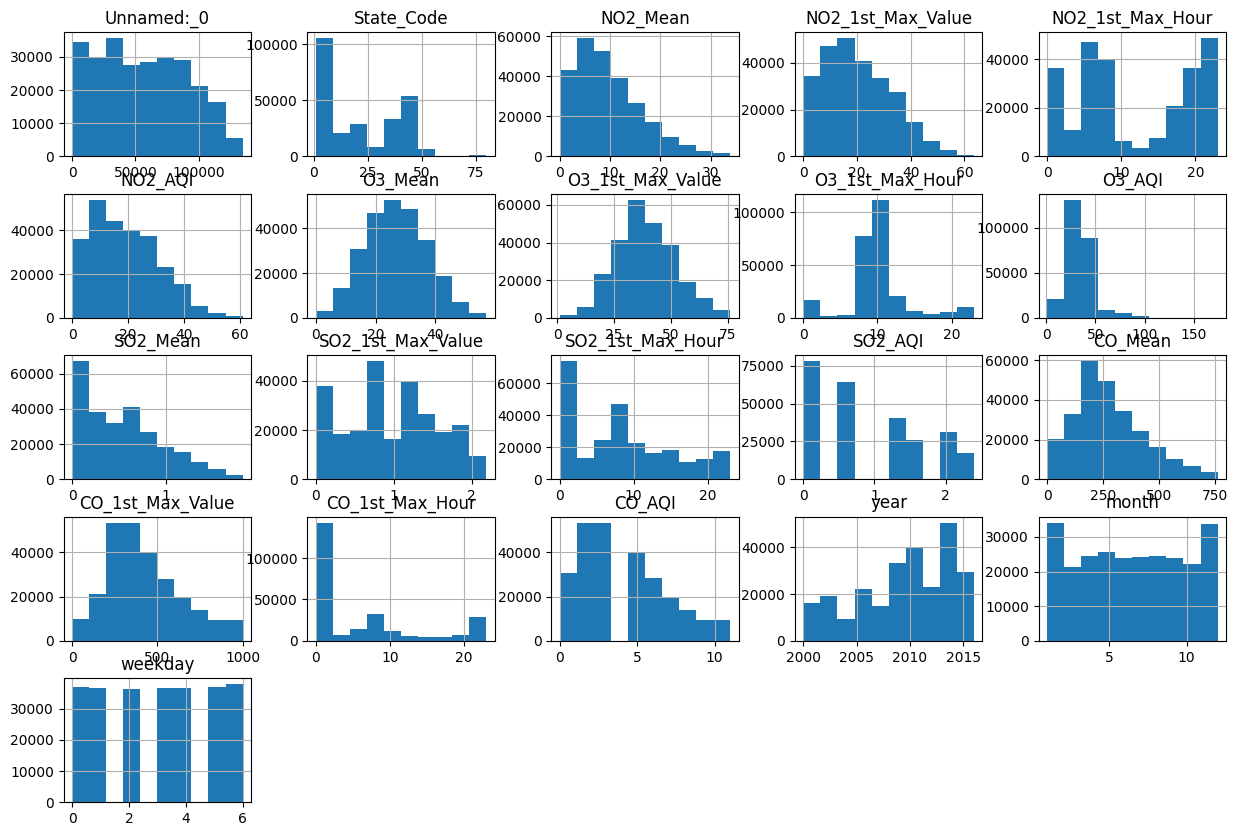

In [66]:
# Resumen estadístico
print(df_clean_shuffled.describe())

# Verificar nulos
print("Analisi de los Nulos")
print(df_clean_shuffled.isnull().sum())

# Distribución de las variables numéricas
numeric_cols = df_clean_shuffled.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if set(df_clean_shuffled[col].dropna().unique()) != {0,1}]

df_clean_shuffled[numeric_cols].hist(figsize=(15,10))
plt.show()


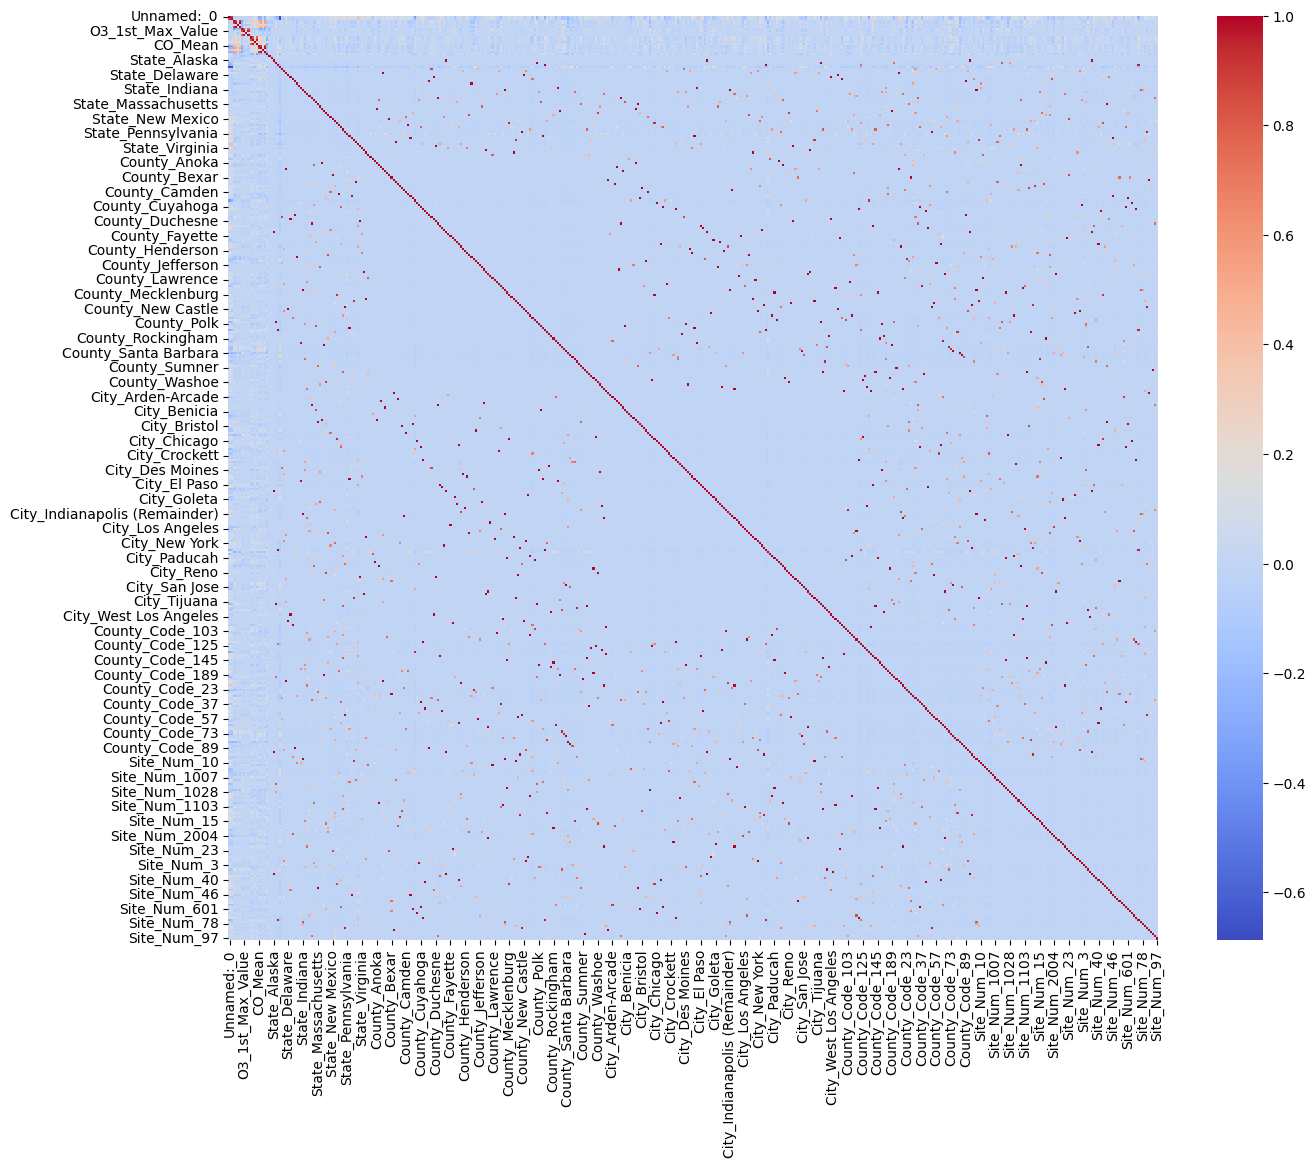

O3_AQI                   1.000000
O3_1st_Max_Value         0.947710
O3_Mean                  0.787545
County_San Bernardino    0.134305
County_Code_71           0.132823
                           ...   
City_San Pablo          -0.078750
Site_Num_4              -0.081556
County_Humboldt         -0.084671
month                   -0.094554
Site_Num_1004           -0.097847
Name: O3_AQI, Length: 442, dtype: float64


In [67]:
# Calcular correlación
correlation_matrix = df_clean_shuffled.corr()

# Mostrar matriz de correlación completa
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

# Correlación específica con la variable objetivo
target = "O3_AQI"
cor_target = correlation_matrix[target].sort_values(ascending=False)
print(cor_target)


Como la matriz de correlacion es tan grande al tener variso columnas binarias y con encoders, vamos a ampliar quitando las columnas binarias

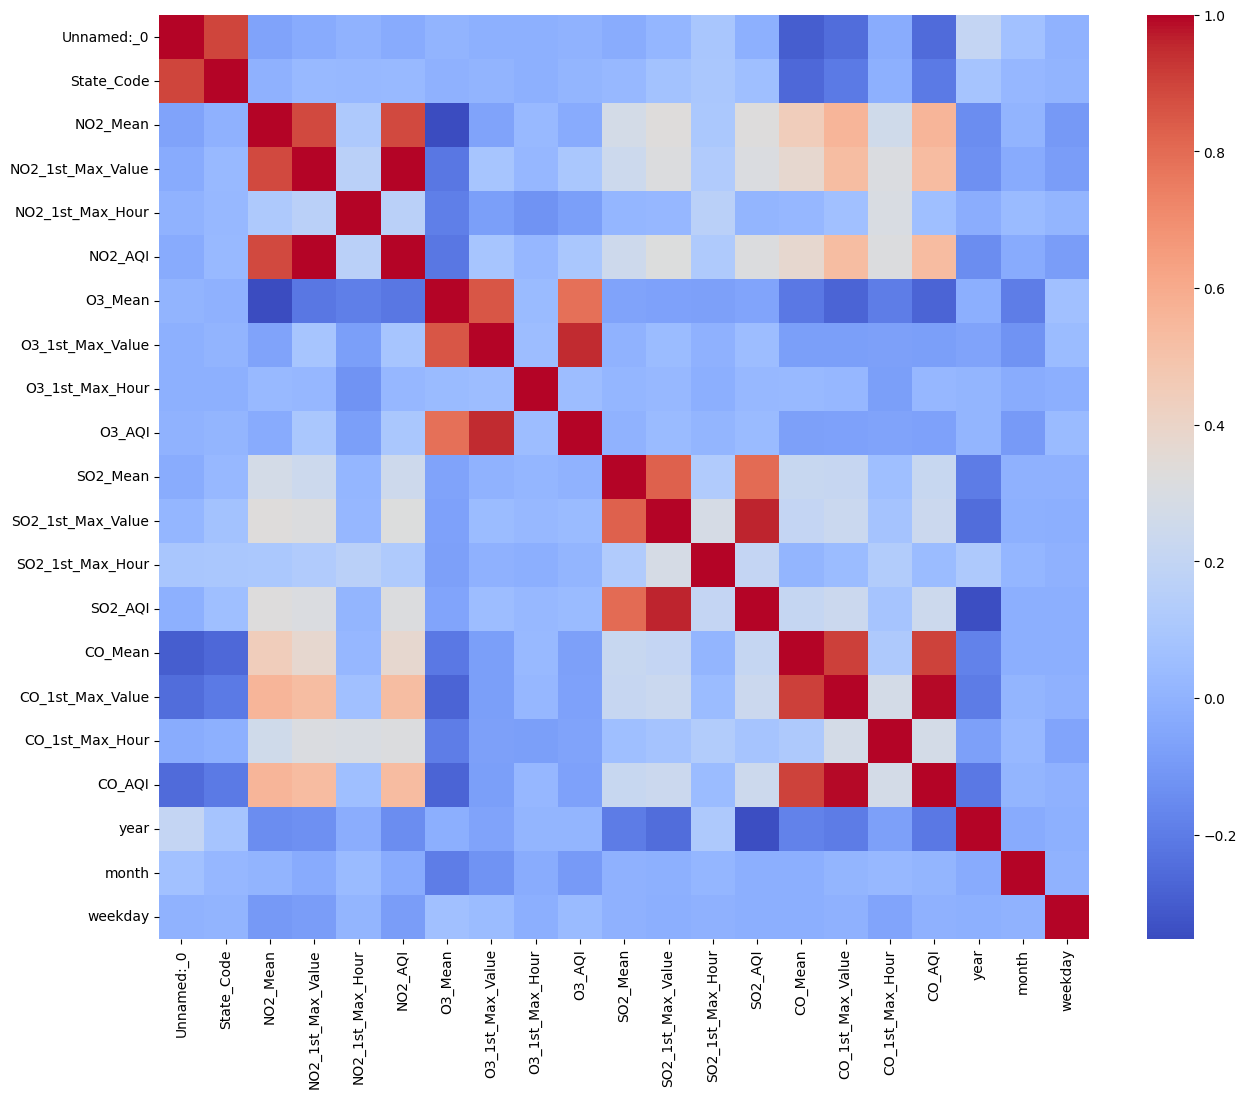

O3_AQI               1.000000
O3_1st_Max_Value     0.947710
O3_Mean              0.787545
NO2_1st_Max_Value    0.100373
NO2_AQI              0.100299
O3_1st_Max_Hour      0.046144
weekday              0.036604
SO2_1st_Max_Value    0.033912
SO2_AQI              0.033445
year                 0.011941
SO2_1st_Max_Hour     0.009819
State_Code           0.008111
Unnamed:_0           0.000751
SO2_Mean            -0.000981
NO2_Mean            -0.030903
CO_1st_Max_Hour     -0.065089
CO_AQI              -0.070314
CO_1st_Max_Value    -0.071516
CO_Mean             -0.072481
NO2_1st_Max_Hour    -0.078635
month               -0.094554
Name: O3_AQI, dtype: float64


In [68]:
# Calcular correlación
correlation_matrix = df_clean_shuffled[numeric_cols].corr()

# Mostrar matriz de correlación completa
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

# Correlación específica con la variable objetivo
target = "O3_AQI"
cor_target = correlation_matrix[target].sort_values(ascending=False)
print(cor_target)


In [70]:
from sklearn.model_selection import train_test_split

X = df_clean_shuffled.drop(columns=[target])
y = df_clean_shuffled[target]

# 70% train, 15% val, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)


(180527, 441) (38685, 441) (38685, 441)


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creamos el modelo
model = LinearRegression()

# Entrenamos en el set de entrenamiento
model.fit(X_train, y_train)

# Predicciones en el set de validación
y_val_pred = model.predict(X_val)

# Predicciones en el set de test
y_test_pred = model.predict(X_test)

# Evaluación en validación
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Resultados en VALIDACIÓN:")
print(f"Mean Squared Error: {mse_val:.2f}")
print(f"R2 Score: {r2_val:.2f}")

# Evaluación en test
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nResultados en TEST:")
print(f"Mean Squared Error: {mse_test:.2f}")
print(f"R2 Score: {r2_test:.2f}")

Resultados en VALIDACIÓN:
Mean Squared Error: 19.46
R2 Score: 0.91

Resultados en TEST:
Mean Squared Error: 18.59
R2 Score: 0.91


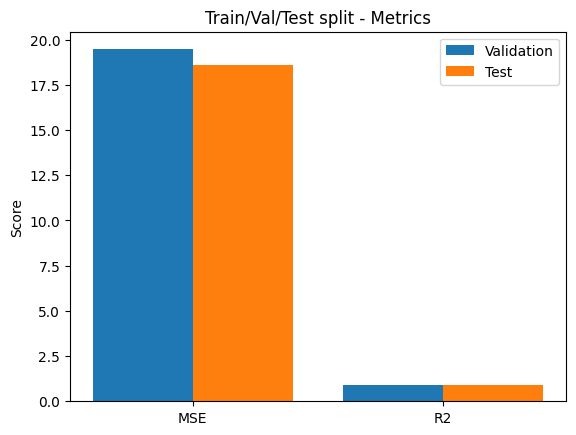

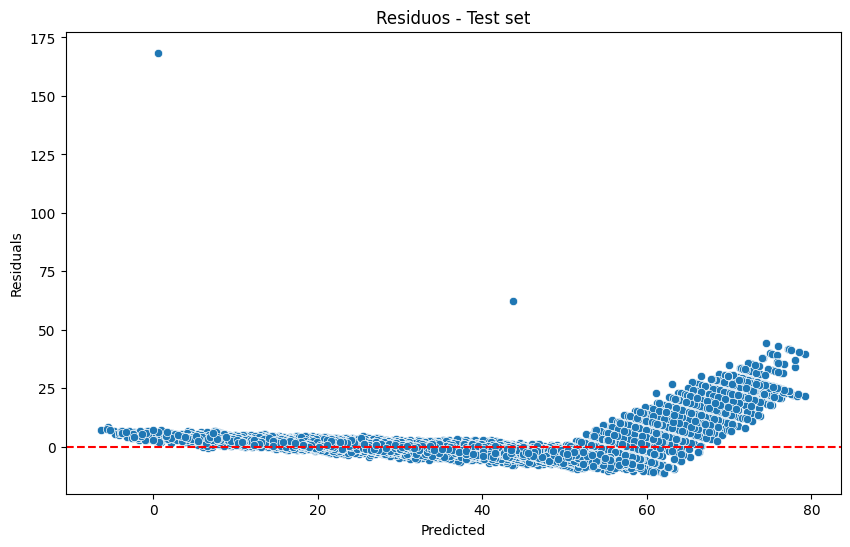

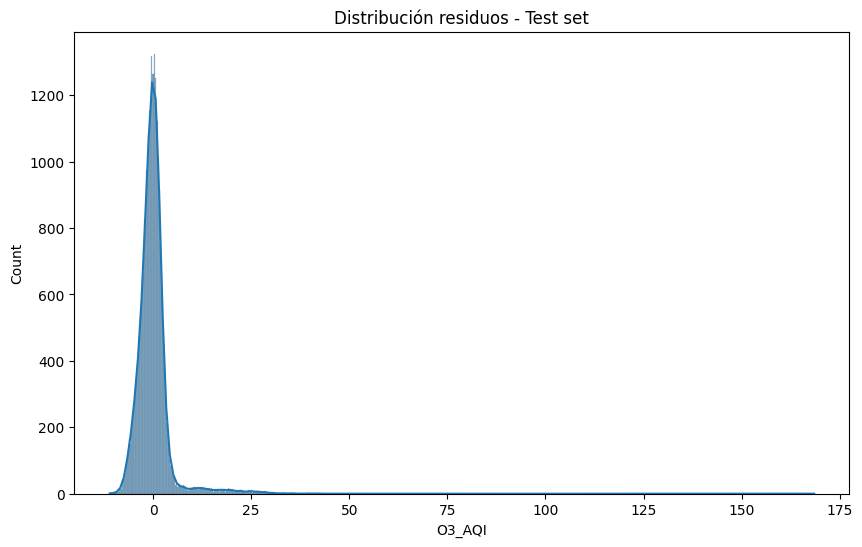

In [72]:
# --- Métricas ---
metrics = ['MSE', 'R2']
val_scores = [mse_val, r2_val]
test_scores = [mse_test, r2_test]

x = range(len(metrics))

plt.bar(x, val_scores, width=0.4, label='Validation', align='center')
plt.bar([i + 0.4 for i in x], test_scores, width=0.4, label='Test', align='center')

plt.xticks([i + 0.2 for i in x], metrics)
plt.ylabel('Score')
plt.legend()
plt.title('Train/Val/Test split - Metrics')
plt.show()

# --- Residuos en TEST ---
residuals_test = y_test - y_test_pred

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test_pred, y=residuals_test)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuos - Test set')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(residuals_test, kde=True)
plt.title('Distribución residuos - Test set')
plt.show()

In [73]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_list = []
r2_list = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    y_val_pred = model.predict(X_val_fold)

    mse = mean_squared_error(y_val_fold, y_val_pred)
    r2 = r2_score(y_val_fold, y_val_pred)

    mse_list.append(mse)
    r2_list.append(r2)

    print(f"Fold {fold+1} - MSE: {mse:.2f}, R2: {r2:.2f}")

print("\nPromedio validación:")
print(f"MSE promedio: {np.mean(mse_list):.2f}")
print(f"R2 promedio: {np.mean(r2_list):.2f}")


Fold 1 - MSE: 19.29, R2: 0.91
Fold 2 - MSE: 18.45, R2: 0.91
Fold 3 - MSE: 18.51, R2: 0.91
Fold 4 - MSE: 17.95, R2: 0.91
Fold 5 - MSE: 18.44, R2: 0.91

Promedio validación:
MSE promedio: 18.53
R2 promedio: 0.91


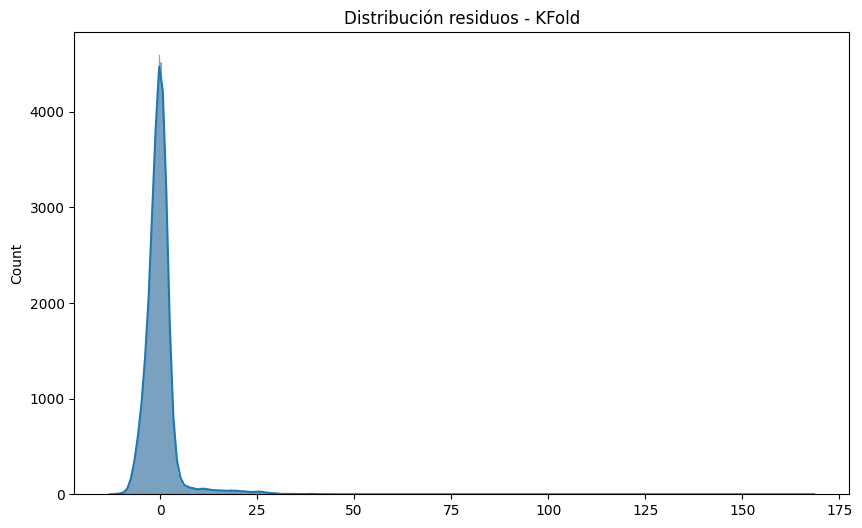

In [74]:
# --- Residuos globales KFold ---
all_residuals = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)

    y_val_pred = model.predict(X_val_fold)

    residuals = y_val_fold - y_val_pred
    all_residuals.extend(residuals)

plt.figure(figsize=(10,6))
sns.histplot(all_residuals, kde=True)
plt.title('Distribución residuos - KFold')
plt.show()


In [75]:
# porque numeracl cols sin binarias no coje 03_AQI y saber si hay que
#categorizar site_num country y demas para despues encoder